# Medical Cost Predictive Analysis


## Life cycle of the project

- Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1. Problem statement

- This project understands how the inividuals medical cost (charges) is affected by other variables such as Age, Sex, BMI, Children, Smoker, Region.


### 2. Data Collection

- Dataset Name (Kaggle) - Medical Cost Personal Datasets
- Dataset Source (Kaggle) - https://www.kaggle.com/mirichoi0218/insurance
- Dataset Source (GitHub) - https://github.com/stedy/Machine-Learning-with-R-datasets
- The data is in CSV format.

#### 2.1 Import Data and Required Packages

##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.


In [1]:
# Importing the libraries for EDA 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Import the CSV Data as Pandas DataFrame


In [2]:
# Reading the dataset and storing it in the variable df
df = pd.read_csv("data/insurance.csv")

##### Show Top 5 Records


In [3]:
# Checking the first 5 rows of the dataset
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

##### Shape of the dataset


In [4]:
# Shape of the dataset
df.shape

(1338, 7)

#### 2.2 Dataset information


- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height objective index of body weight (kg / m ^ 2) using the ratio of height to weight, (ideally 18.5 to 24.9)
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column


#### 3.1 Check Missing values


In [5]:
# Checking missing values in the dataset
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### There are no missing values in the data set as shown above.


#### 3.2 Check Duplicates


In [6]:
# Checking duplicate values in the dataset
df.duplicated().sum()

1

##### There are just 1 duplicate record in the data set which can be dropped as it is not going to affect the model performance much.


#### 3.3 Check data types


In [7]:
# Checking the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### 3.4 Checking the number of unique values of each column


In [8]:
# Checking unique values in the dataset
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

#### 3.5 Check statistics of data set


In [9]:
# Checking the statistical summary of the dataset
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

##### Insight

- The age of the individuals in the dataset ranges from 18 to 64, with an average age of approximately 39 years. The data's standard deviation of around 14 suggests a moderate spread in ages.
- The BMI values range from 15.96 to 53.13, with an average BMI of about 30.66. This indicates that, on average, the individuals in the dataset tend to have a BMI in the overweight range.
- The number of children per individual varies from 0 to 5, with an average of approximately 1.09. Most individuals have fewer than 3 children, as indicated by the 75th percentile value of 2.
- The insurance charges (premiums) range from $1,121.87 to $63,770.43, with an average charge of approximately $13,270.42. The charges have a relatively high standard deviation of around $12,110, indicating a wide distribution in insurance costs.


#### 3.6 Exploring Data


In [10]:
# Checking 5 rows randomly from the dataset
df.sample(5)

age     sex     bmi  children smoker     region      charges
980   54    male  25.460         1     no  northeast  25517.11363
149   19    male  28.400         1     no  southwest   1842.51900
624   59    male  28.785         0     no  northwest  12129.61415
187   30  female  30.900         3     no  southwest   5325.65100
627   33    male  42.460         1     no  southeast  11326.71487

In [11]:
# Categories in the different dataset variables
print("Categories in 'sex' variable:     ", end=" ")
print(df["sex"].unique())

print("Categories in 'smoker' variable:  ", end=" ")
print(df["smoker"].unique())

print("Categories in'region' variable:", end=" ")
print(df["region"].unique())

print("Categories in 'children' variable:     ", end=" ")
print(df["children"].unique())

Categories in 'sex' variable:      ['female' 'male']
Categories in 'smoker' variable:   ['yes' 'no']
Categories in'region' variable: ['southwest' 'southeast' 'northwest' 'northeast']
Categories in 'children' variable:      [0 1 3 2 5 4]


In [12]:
# define numerical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]

# print columns
print(f"We have {len(numeric_features)} numerical features : {numeric_features}")

# Top 5 rows of the numerical features
df[numeric_features].head()

We have 4 numerical features : ['age', 'bmi', 'children', 'charges']


age     bmi  children      charges
0   19  27.900         0  16884.92400
1   18  33.770         1   1725.55230
2   28  33.000         3   4449.46200
3   33  22.705         0  21984.47061
4   32  28.880         0   3866.85520

In [13]:
# define categorical columns
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

# print columns
print(
    f"\nWe have {len(categorical_features)} categorical features : {categorical_features}"
)

# Top 5 rows of the categorical features
df[categorical_features].head()


We have 3 categorical features : ['sex', 'smoker', 'region']


sex smoker     region
0  female    yes  southwest
1    male     no  southeast
2    male     no  southeast
3    male     no  northwest
4    male     no  northwest

In [14]:
# Discrete numerical features
discrete_feature = [
    feature for feature in numeric_features if len(df[feature].unique()) < 25
]
print(f"We have {len(discrete_feature)} discrete features : {discrete_feature}")

# Top 5 rows of the discrete features
df[discrete_feature].head()

We have 1 discrete features : ['children']


children
0         0
1         1
2         3
3         0
4         0

In [15]:
# Contunious numerical features
continuous_feature = [
    feature
    for feature in numeric_features
    if feature not in discrete_feature and feature not in ["charges"]
]
print(f"We have {len(continuous_feature)} continuous features : {continuous_feature}")

# Top 5 rows of the continuous features
df[continuous_feature].head()

We have 2 continuous features : ['age', 'bmi']


age     bmi
0   19  27.900
1   18  33.770
2   28  33.000
3   33  22.705
4   32  28.880

#### 3.7 Cardinality of Categorical Columns


In [16]:
# Checking the cardinality of the categorical features
for feature in categorical_features:
    print(f"The feature is {feature} and it has {len(df[feature].unique())} categories")

The feature is sex and it has 2 categories
The feature is smoker and it has 2 categories
The feature is region and it has 4 categories


#### 3.8 Some More Observations


Q. How many males and females smokers and non-smokers are in the dataset?


In [17]:
# dataframes only with male and female data
male_df = df[df["sex"] == "male"]
female_df = df[df["sex"] == "female"]

# count the number of smokers and non-smokers for males
male_smoker_counts = male_df["smoker"].value_counts()
female_smoker_counts = female_df["smoker"].value_counts()

# print the counts
print("Number of male smokers:", male_smoker_counts["yes"])
print("Number of male non-smokers:", male_smoker_counts["no"])

print("-------------------------------------------")

print("Number of female smokers:", female_smoker_counts["yes"])
print("Number of female non-smokers:", female_smoker_counts["no"])

Number of male smokers: 159
Number of male non-smokers: 517
-------------------------------------------
Number of female smokers: 115
Number of female non-smokers: 547


Q. What is the average BMI for male and female personals in the dataset?


In [18]:
# group the data by gender and calculate the mean of the BMI column
bmi_by_gender = df.groupby("sex")["bmi"].mean()

# print the result rounded to 2 decimal places
print(f"Average BMI for female personals: {bmi_by_gender['female']:.2f}")
print(f"Average BMI for male personals: {bmi_by_gender['male']:.2f}")

Average BMI for female personals: 30.38
Average BMI for male personals: 30.94


Q. What is the percentage of smokers in the dataset?


In [19]:
# count the number of smokers and non-smokers
smoker_counts = df["smoker"].value_counts()

# print the counts
print("Number of smokers:", smoker_counts["yes"])
print("Number of non-smokers:", smoker_counts["no"])

print("-------------------------------------------")
# calculate the percentages
total_count = smoker_counts.sum()
smoker_percent = (smoker_counts["yes"] / total_count) * 100
non_smoker_percent = (smoker_counts["no"] / total_count) * 100

# print the percentages
print("Percentage of smokers:", smoker_percent)
print("Percentage of non-smokers:", non_smoker_percent)

Number of smokers: 274
Number of non-smokers: 1064
-------------------------------------------
Percentage of smokers: 20.47832585949178
Percentage of non-smokers: 79.52167414050822


Q. Do smokers tend to have higher insurance charges on average compared to non-smokers in the dataset? If so, by how much?


In [20]:
# group the data by smoking status and calculate the mean of the charges column
charges_by_smoking_status = df.groupby("smoker")["charges"].mean()

# print the result rounded to 2 decimal places
print(f"Average charges for smokers: {charges_by_smoking_status['yes']:.2f}")
print(f"Average charges for non-smokers: {charges_by_smoking_status['no']:.2f}")

print("-------------------------------------------")
# calculate the difference between the charges for smokers and non-smokers
difference = charges_by_smoking_status["yes"] - charges_by_smoking_status["no"]

# print the difference rounded to 2 decimal places
print(f"Difference in average charges: {difference:.2f}")

Average charges for smokers: 32050.23
Average charges for non-smokers: 8434.27
-------------------------------------------
Difference in average charges: 23615.96


Q. What is the distribution of smokers and non-smokers across different ages in the dataset?


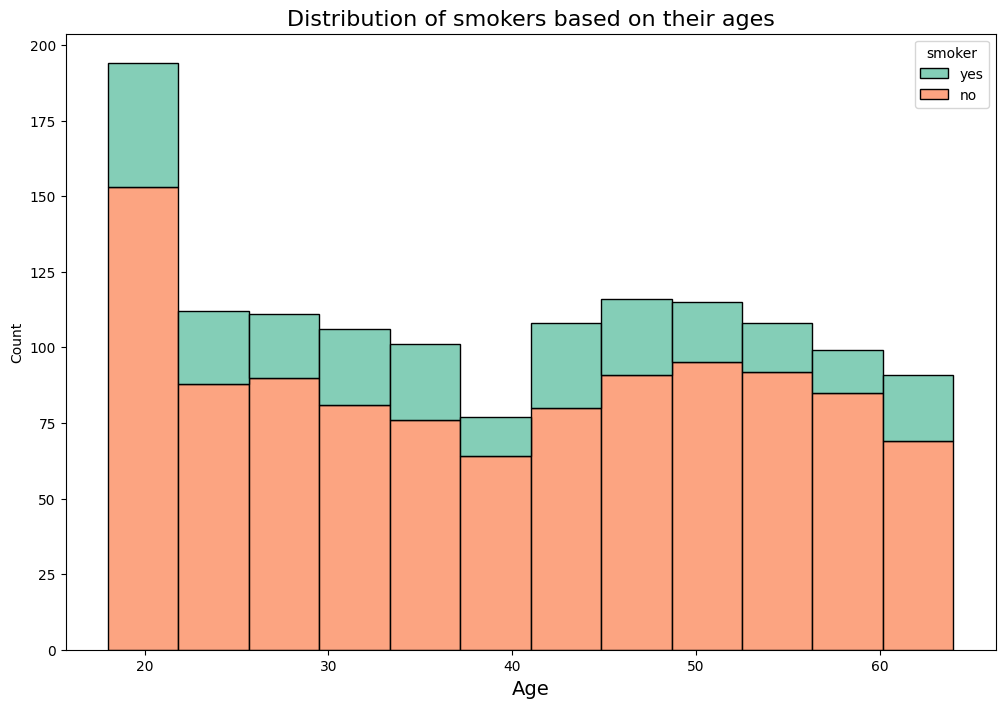

In [21]:
# figure size
plt.figure(figsize=(12, 8))

# distribution plot for ages of both smokers and non-smokers
sns.histplot(
    data=df, x="age", hue="smoker", multiple="stack", palette="Set2", alpha=0.8
)

# title and labels
plt.title("Distribution of smokers based on their ages", fontsize=16)
plt.xlabel("Age", fontsize=14)

# show the plot
plt.show()

Q. What is the distribution of smokers and non-smokers across different BMI in the dataset?


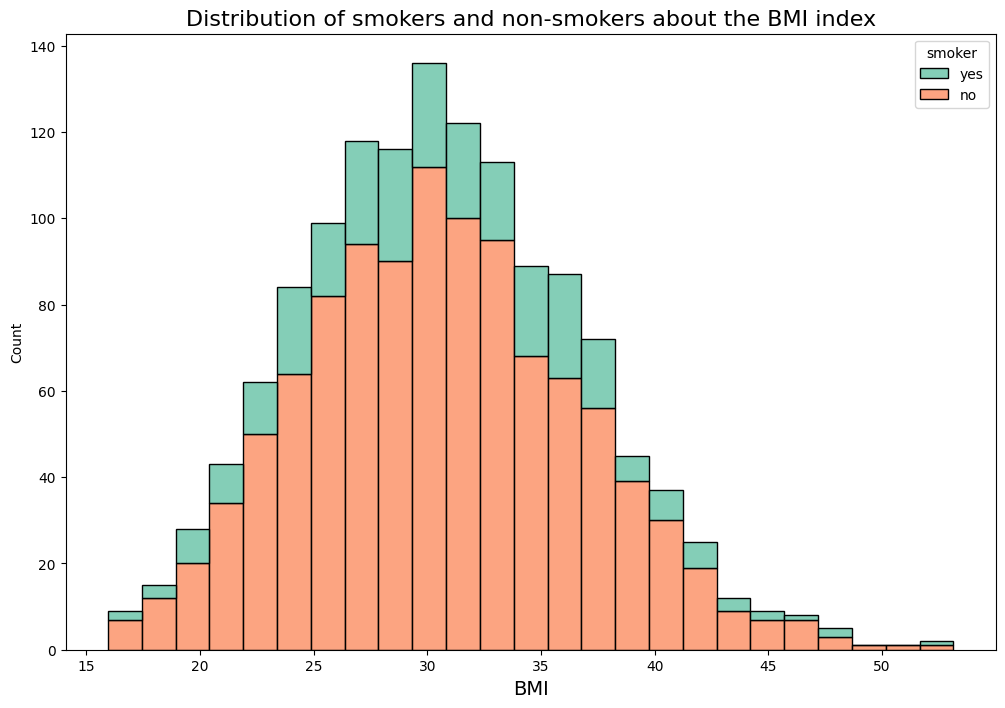

In [22]:
# figure size
plt.figure(figsize=(12, 8))

# distribution plot for bmi
sns.histplot(
    data=df, x="bmi", hue="smoker", multiple="stack", palette="Set2", alpha=0.8
)

# title and labels
plt.title("Distribution of smokers and non-smokers about the BMI index", fontsize=16)
plt.xlabel("BMI", fontsize=14)

# show the plot
plt.show()

Q. Calculate average charges for different regions in the dataset? Which regions have the highest and lowest insurance charges?

- What is the difference in the average insurance charges between the two? Is this difference statistically significant?
- Do the regions with highest insurance charges also have the highest number of smokers?
- Do the regions with highest insurance charges also have the highest number of individuals with BMI > 30 (considered overweight)?
- Do the regions with highest insurance charges also have the highest number of individuals with children?


In [23]:
# group the data by region and calculate the mean of the charges column
charges_by_region = df.groupby("region")["charges"].mean()

# print the result rounded to 2 decimal places
print(f"Average charges for southwest: {charges_by_region['southwest']:.2f}")
print(f"Average charges for southeast: {charges_by_region['southeast']:.2f}")
print(f"Average charges for northwest: {charges_by_region['northwest']:.2f}")
print(f"Average charges for northeast: {charges_by_region['northeast']:.2f}")

print("-------------------------------------------")
# highest average charges and the lowest average charges
print("Highest average charges are of southeast:", charges_by_region.max())
print("Lowest average charges are of southwest:", charges_by_region.min())

print("-------------------------------------------")

# calculate the difference between the highest and lowest average charges
difference = charges_by_region.max() - charges_by_region.min()

# print the difference rounded to 2 decimal places
print(f"Difference in highest and lowest average charges: {difference:.2f}")

Average charges for southwest: 12346.94
Average charges for southeast: 14735.41
Average charges for northwest: 12417.58
Average charges for northeast: 13406.38
-------------------------------------------
Highest average charges are of southeast: 14735.41143760989
Lowest average charges are of southwest: 12346.937377292308
-------------------------------------------
Difference in highest and lowest average charges: 2388.47


In [24]:
from scipy.stats import ttest_ind

# create two dataframes
southeast = df[df["region"] == "southeast"]
southwest = df[df["region"] == "southwest"]

# perform t-test
ttest = ttest_ind(southeast["charges"], southwest["charges"])

# print the p-value
print(f"p-value: {ttest.pvalue:.10f}")

p-value: 0.0154306511


region
southeast    91
northeast    67
southwest    58
northwest    58
Name: count, dtype: int64


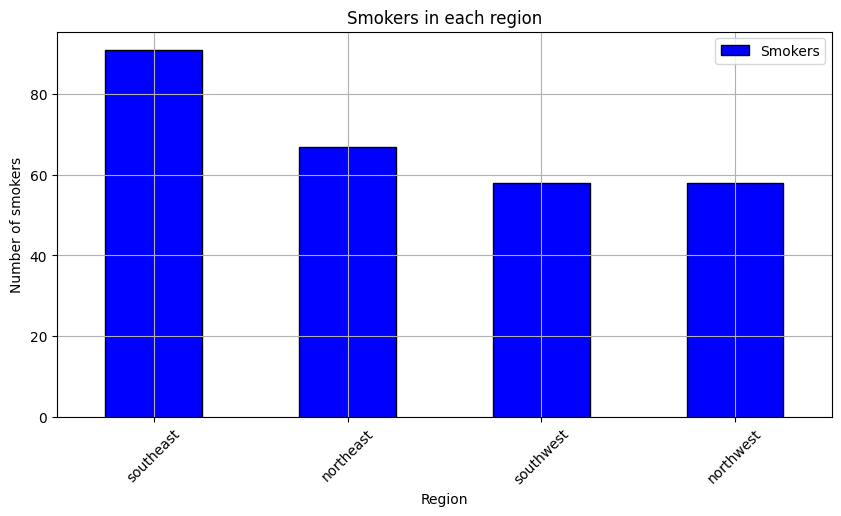

In [25]:
# count the number of smokers in each region
smokers_by_region = df.loc[df["smoker"] == "yes"]["region"].value_counts()

# print the result
print(smokers_by_region)

# create a bar plot of the number of smokers in each region
smokers_by_region.plot.bar(
    figsize=(10, 5),
    color="blue",
    label="Smokers",
    rot=45,
    legend=True,
    grid=True,
    linewidth=1,
    edgecolor="k",
)

# set the title and labels
plt.title("Smokers in each region")
plt.xlabel("Region")
plt.ylabel("Number of smokers")

# show the plot
plt.show()

region
northeast    143
northwest    148
southeast    243
southwest    171
Name: bmi, dtype: int64


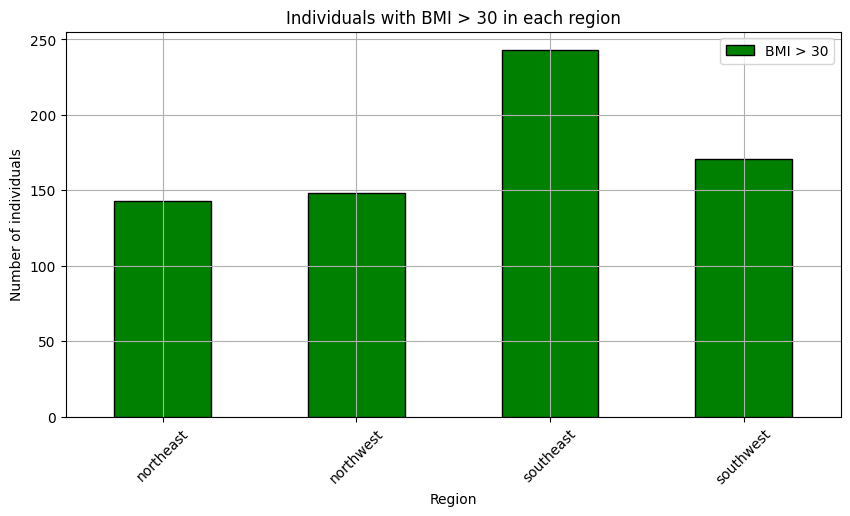

In [26]:
# group the data by region and calculate the number of individuals with BMI > 30 in each region
overweight_by_region = df[df["bmi"] > 30].groupby("region")["bmi"].count()

# print the result
print(overweight_by_region)

# display the data in a bar plot
overweight_by_region.plot(
    kind="bar",
    figsize=(10, 5),
    color="green",
    label="BMI > 30",
    rot=45,
    legend=True,
    grid=True,
    linewidth=1,
    edgecolor="k",
)

# set the title and labels
plt.title("Individuals with BMI > 30 in each region")
plt.xlabel("Region")
plt.ylabel("Number of individuals")

# show the plot
plt.show()

region     children
northeast  1           77
           2           51
           3           39
           4            7
           5            3
northwest  1           74
           2           66
           3           46
           4            6
           5            1
southeast  1           95
           2           66
           3           35
           5            6
           4            5
southwest  1           78
           2           57
           3           37
           5            8
           4            7
Name: count, dtype: int64
-------------------------------------------
region
northeast    177
northwest    193
southeast    207
southwest    187
Name: children, dtype: int64


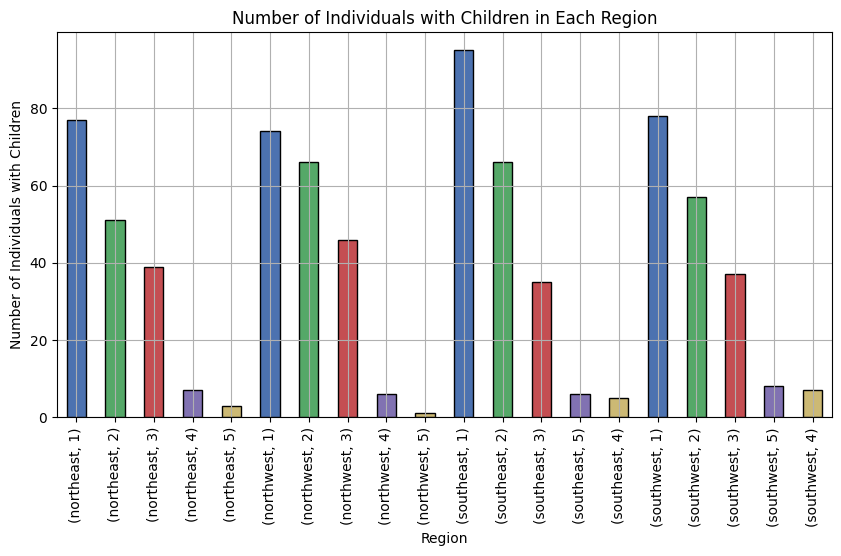

In [27]:
# group the data by region and calculate the number of individuals with children in each region
children_by_region = df[df["children"] > 0].groupby("region")["children"].value_counts()
children_by_region_total = df[df["children"] > 0].groupby("region")["children"].count()

# print the result
print(children_by_region)
print("-------------------------------------------")
print(children_by_region_total)

# display the data in a bar plot
children_by_region.plot(
    kind="bar",
    figsize=(10, 5),
    color=["#4C72B0", "#55A868", "#C44E52", "#8172B2", "#CCB974"],
    edgecolor="black",
    linewidth=1,
    grid=True,
)

# set the title and labels
plt.title("Number of Individuals with Children in Each Region")
plt.xlabel("Region")
plt.ylabel("Number of Individuals with Children")

# show the plot
plt.show()

Q. How many individuals fall within the ideal BMI range (18.5 to 24.9)?


In [28]:
# data for individuals with ideal BMI
ideal_bmi = df[(df["bmi"] >= 18.5) & (df["bmi"] <= 24.9)]

# print the first 5 rows of the dataframe
print(ideal_bmi.head())
print("------------------------------------------------")

# Number of individuals with ideal BMI
print(f"Number of individuals with ideal BMI: {ideal_bmi.shape[0]}")

    age     sex     bmi  children smoker     region      charges
3    33    male  22.705         0     no  northwest  21984.47061
15   19    male  24.600         1     no  southwest   1837.23700
17   23    male  23.845         0     no  northeast   2395.17155
26   63  female  23.085         0     no  northeast  14451.83515
35   19    male  20.425         0     no  northwest   1625.43375
------------------------------------------------
Number of individuals with ideal BMI: 222


Q. What is the average insurance charge for individuals with no children (children=0), one child (children=1), etc.?


children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64


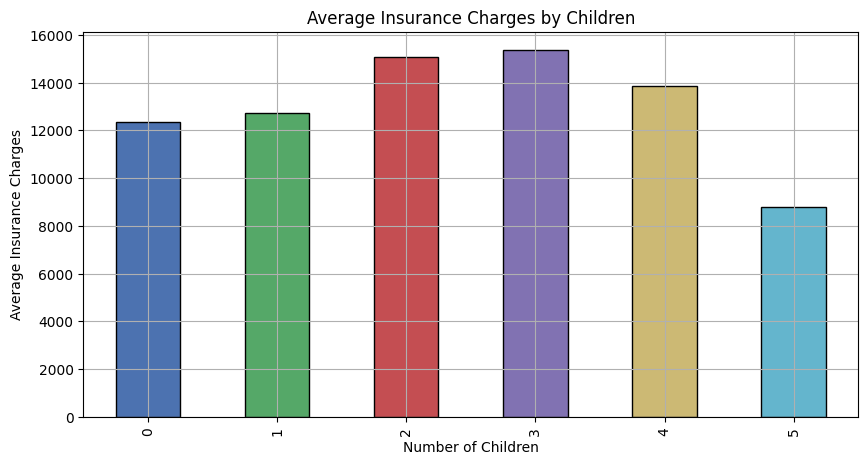

In [29]:
# group the data by children and calculate the average charges for each group
average_charges_by_children = df.groupby("children")["charges"].mean()

# print the result
print(average_charges_by_children)

# display the data in a bar plot
average_charges_by_children.plot(
    kind="bar",
    figsize=(10, 5),
    color=["#4C72B0", "#55A868", "#C44E52", "#8172B2", "#CCB974", "#64B5CD"],
    edgecolor="black",
    linewidth=1,
    grid=True,
)

# set the title and labels
plt.title("Average Insurance Charges by Children")
plt.xlabel("Number of Children")
plt.ylabel("Average Insurance Charges")

# show the plot
plt.show()

##### Insights

- Male and female are almost equally distributed in the dataset. And the average BMI of both male and female is almost same.
- 20.48% of the individuals in the dataset are smokers. So, majority of the individuals in the dataset are non-smokers.
- Smokers tend to have higher insurance charges on average compared to non-smokers in the dataset. The average insurance charge for smokers is $32,050.23, which is more than double the average insurance charge for non-smokers ($8,434.27).
- Across different ages in the dataset, the number of non-smokers is higher than the number of smokers in all age groups.
- Across different BMIs in the dataset, the number of non-smokers is higher than the number of smokers in all BMI indexes.
- The southeast region has the highest average insurance charges, while the southwest region has the lowest average insurance charges.
- The southeast region has the highest number of smokers, while the northwest and southwest region has the lowest number of smokers.
- The southeast region has the highest number of individuals with BMI > 30 (considered overweight), while the northeast region has the lowest number of individuals with BMI > 30.
- The southeast region has the highest number of individuals with children, while the northeast region has the lowest number of individuals with children.
- 222 individuals fall within the ideal BMI range (18.5 to 24.9).
- The average insurance charge for individuals with three children (children=3) is $15,355.32, which is the highest among all the categories. The average insurance charge for individuals with five children (children=5) is the lowest among all the categories.


### 4. Exploring Data (Visualizations)


#### 4.1 Visualize average score distribution to make some conclusion.

- Histogram
- Kernel Distribution Function (KDE)

##### 4.1.1 Histogram & KDE


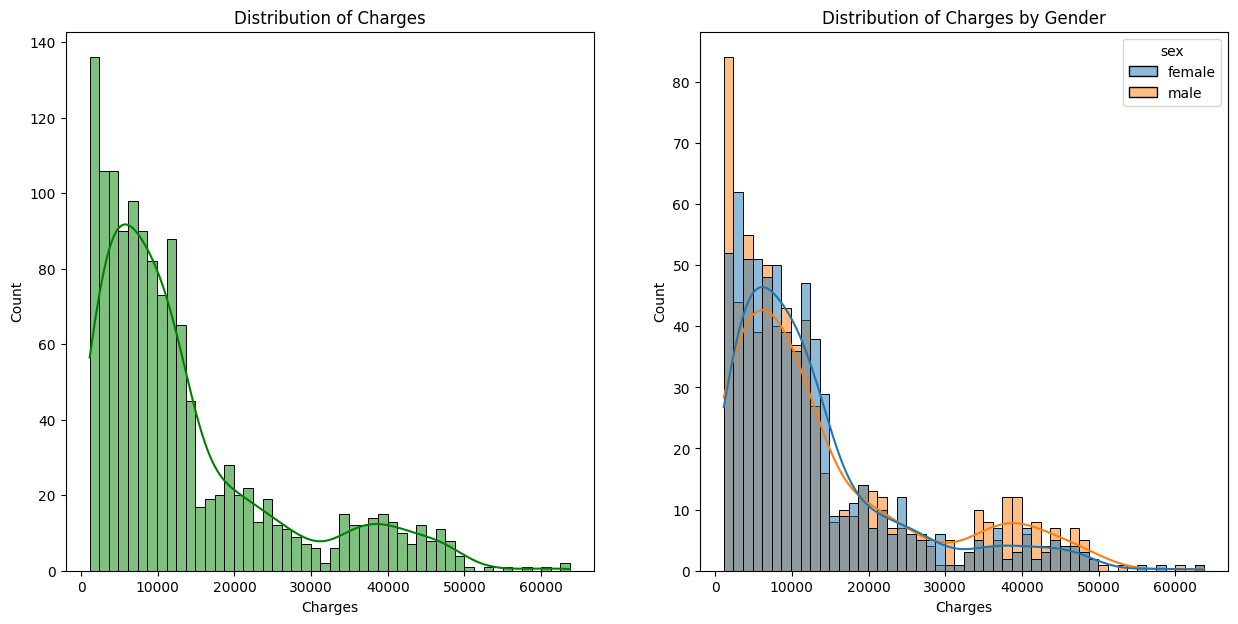

In [30]:
# create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# create the first subplot with a histogram of charges
sns.histplot(data=df, x="charges", bins=50, kde=True, color="g", ax=axs[0])
axs[0].set_xlabel("Charges")
axs[0].set_ylabel("Count")
axs[0].set_title("Distribution of Charges")

# create the second subplot with two histograms of charges, one for each gender
sns.histplot(data=df, x="charges", kde=True, hue="sex", bins=50, ax=axs[1])
axs[1].set_xlabel("Charges")
axs[1].set_ylabel("Count")
axs[1].set_title("Distribution of Charges by Gender")

# show the plot
plt.show()

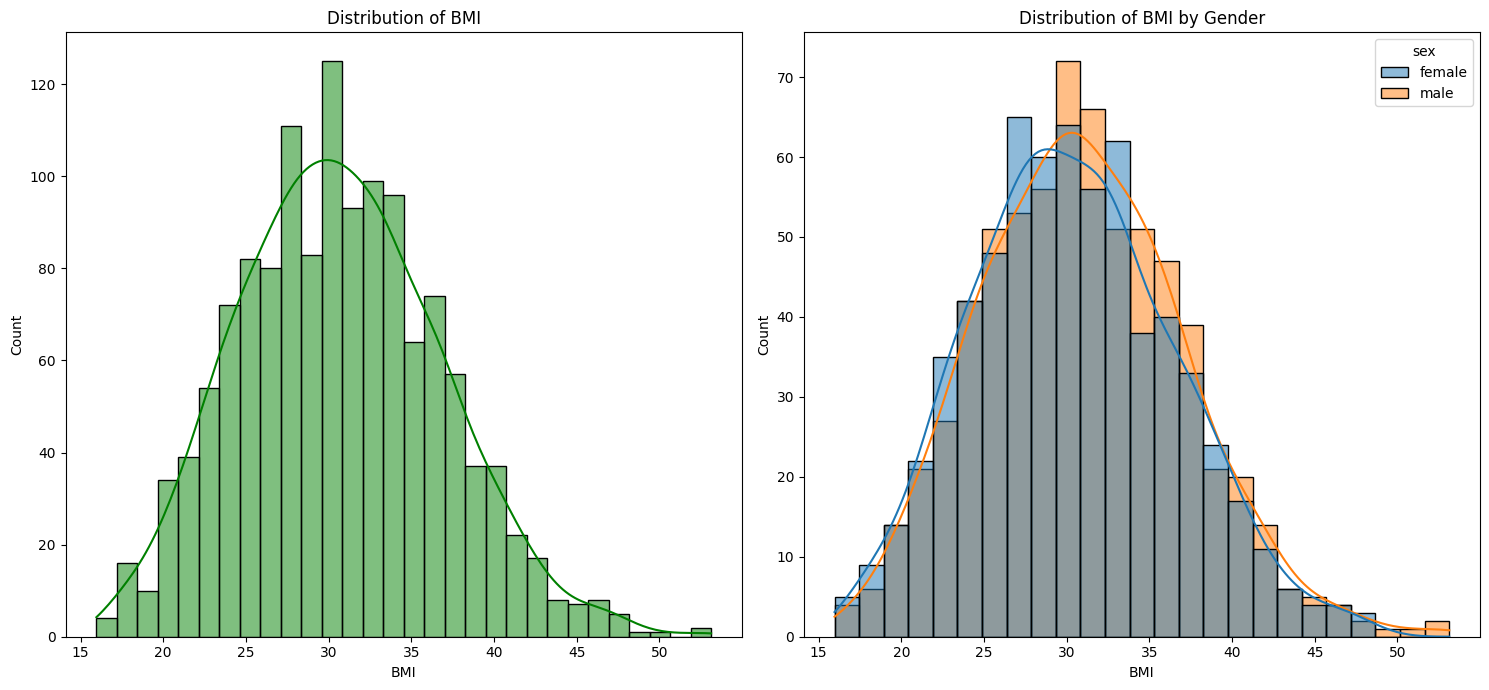

In [31]:
# create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# first subplot and second subplot with a histogram of bmi and a kde plot of bmi respectively
sns.histplot(data=df, x="bmi", bins=30, kde=True, color="g", ax=axs[0])
sns.histplot(data=df, x="bmi", kde=True, hue="sex", ax=axs[1])

# set the title and labels of the first subplot
axs[0].set_xlabel("BMI")
axs[0].set_ylabel("Count")
axs[0].set_title("Distribution of BMI")

# set the title and labels of the second subplot
axs[1].set_xlabel("BMI")
axs[1].set_ylabel("Count")
axs[1].set_title("Distribution of BMI by Gender")

# show the plot
plt.tight_layout()

Insights

- The distribution of insurance charges is right-skewed, with a long tail on the right. This suggests that there are a small number of individuals who are charged a very high premium.
- The distribution of BMI values is approximately normal, with a few outliers on the right. This suggests that most individuals in the dataset have a BMI in the overweight range. The distribution is centered around the average BMI value of approximately 30.


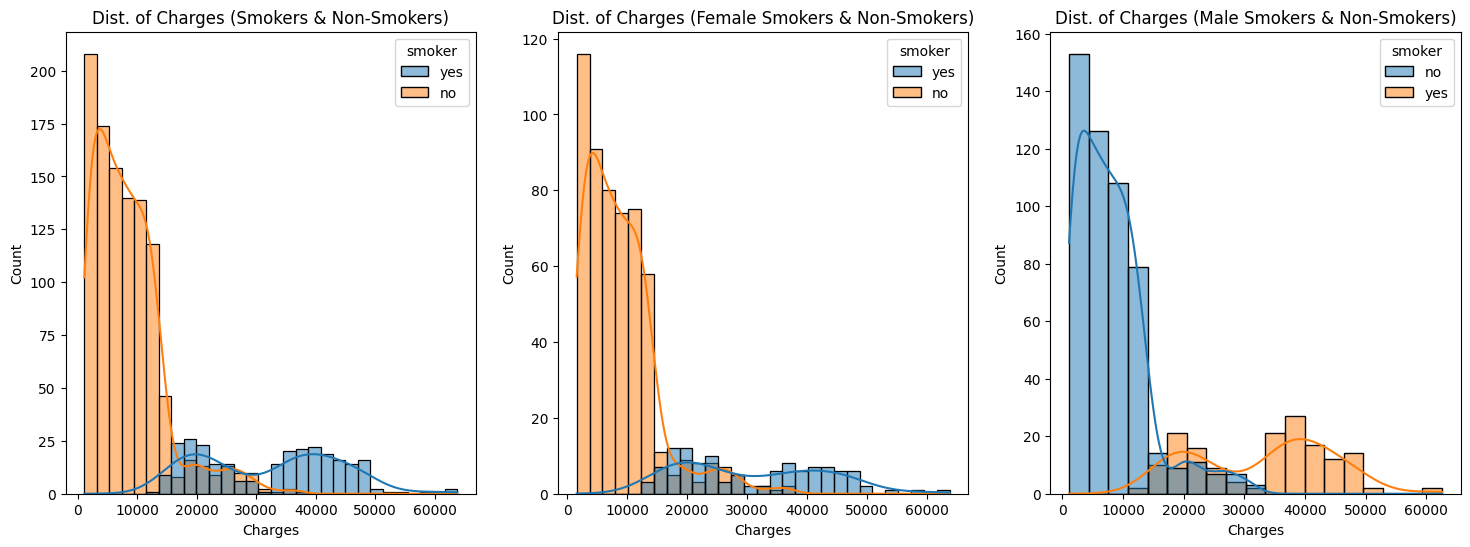

In [32]:
# create a figure with three subplots and set the figure size
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# plot 1: charges distribution for smokers and non-smokers
plt.subplot(131)
sns.histplot(data=df, x="charges", kde=True, hue="smoker")

# set the title and labels of the first subplot
plt.title("Dist. of Charges (Smokers & Non-Smokers)")
plt.xlabel("Charges")
plt.ylabel("Count")

# plot 2: charges distribution for female smokers and non-smokers
plt.subplot(132)
sns.histplot(data=df[df.sex == "female"], x="charges", kde=True, hue="smoker")

# set the title and labels of the second subplot
plt.title("Dist. of Charges (Female Smokers & Non-Smokers)")
plt.xlabel("Charges")
plt.ylabel("Count")

# plot 3: charges distribution for male smokers and non-smokers
plt.subplot(133)
sns.histplot(data=df[df.sex == "male"], x="charges", kde=True, hue="smoker")

# set the title and labels of the second subplot
plt.title("Dist. of Charges (Male Smokers & Non-Smokers)")
plt.xlabel("Charges")
plt.ylabel("Count")

# show the plot
plt.show()

Insights

- For non-smokers, the distribution of insurance charges is right-skewed, with a long tail on the right. This suggests that there are a small number of non-smokers who are charged a very high premium. While smokers are charged a higher premium on average, can be seen from the plot.


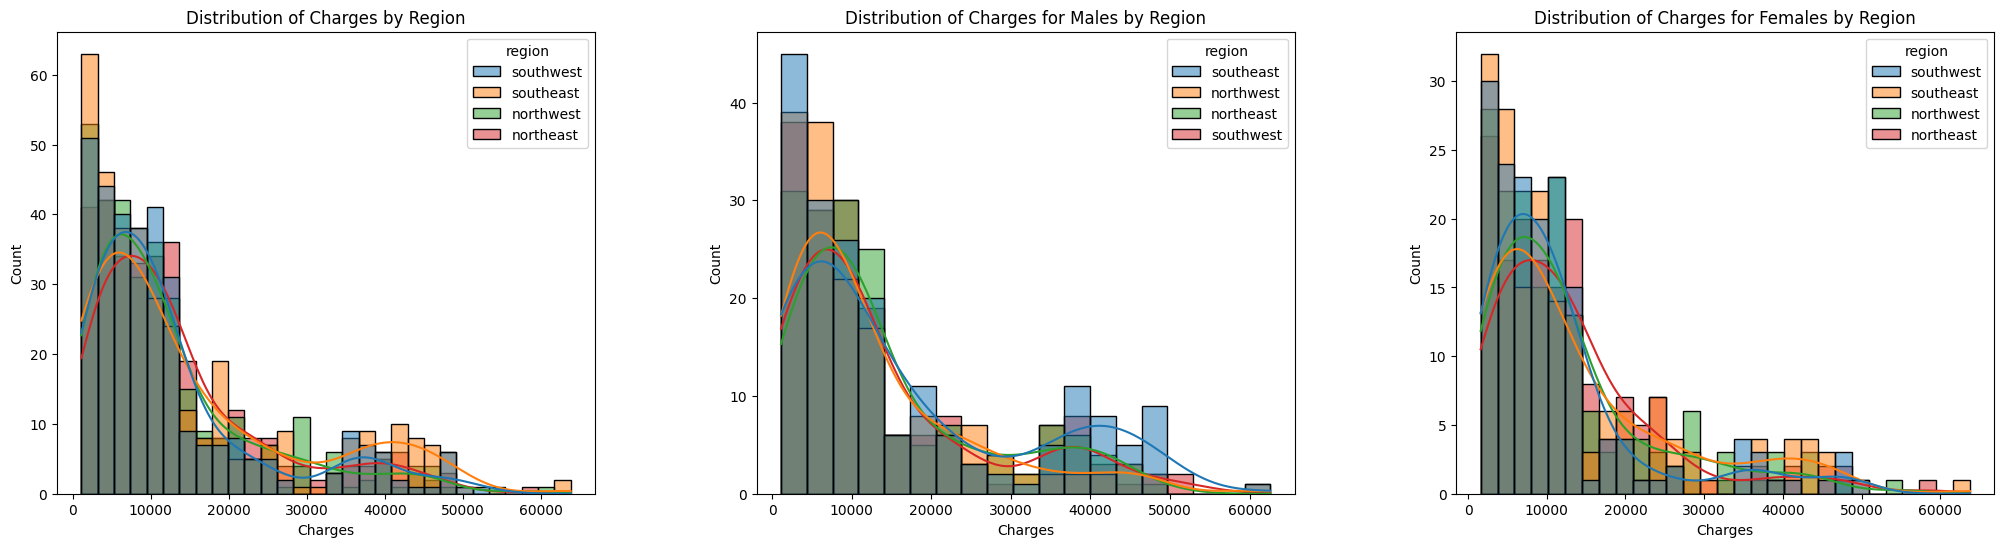

In [33]:
# create a figure with three subplots and set the figure size
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplots_adjust(wspace=0.3)

# plot 1: charges distribution by region
sns.histplot(data=df, x="charges", kde=True, hue="region", ax=axs[0])

# set the title and labels of the first subplot
axs[0].set_title("Distribution of Charges by Region")
axs[0].set_xlabel("Charges")
axs[0].set_ylabel("Count")

# plot 2: charges distribution for male by region
sns.histplot(data=df[df.sex == "male"], x="charges", kde=True, hue="region", ax=axs[1])

# set the title and labels of the second subplot
axs[1].set_title("Distribution of Charges for Males by Region")
axs[1].set_xlabel("Charges")
axs[1].set_ylabel("Count")

# plot 3: charges distribution for female by region
sns.histplot(
    data=df[df.sex == "female"], x="charges", kde=True, hue="region", ax=axs[2]
)

# set the title and labels of the third subplot
axs[2].set_title("Distribution of Charges for Females by Region")
axs[2].set_xlabel("Charges")
axs[2].set_ylabel("Count")

plt.show()

Insights

- The distribution of insurance charges for regions southeast and southwest is right-skewed, with a long tail on the right. This suggests that there are a small number of individuals in these regions who are charged a very high premium.


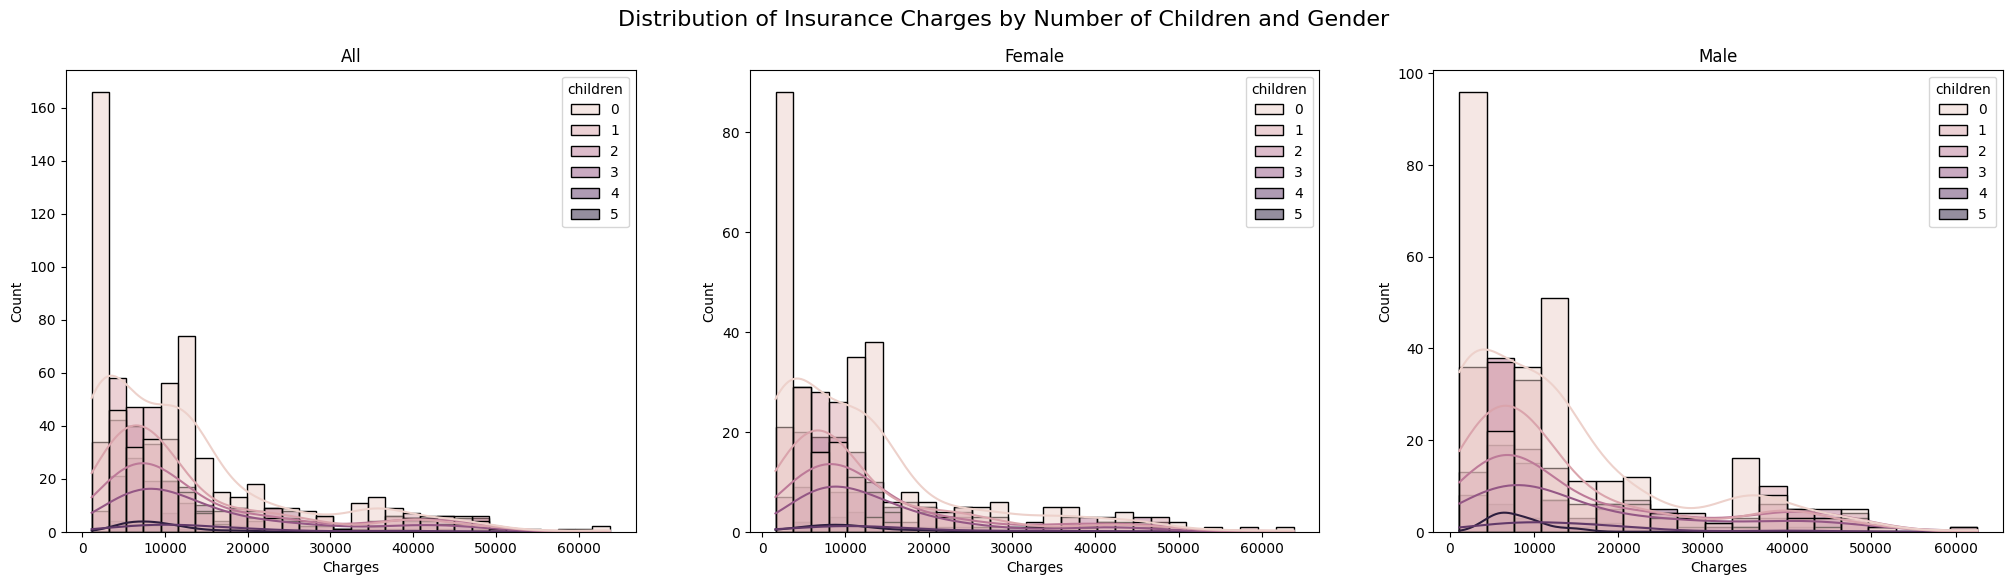

In [34]:
# create a figure with three subplots and set the figure size
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
fig.suptitle(
    "Distribution of Insurance Charges by Number of Children and Gender", fontsize=16
)

# plot 1: charges distribution by number of children
sns.histplot(data=df, x="charges", kde=True, hue="children", ax=axs[0])

# set the title and labels of the first subplot
axs[0].set_title("All")
axs[0].set_xlabel("Charges")
axs[0].set_ylabel("Count")

# plot 2: charges distribution for female by number of children
sns.histplot(
    data=df[df.sex == "female"], x="charges", kde=True, hue="children", ax=axs[1]
)

# set the title and labels of the second subplot
axs[1].set_title("Female")
axs[1].set_xlabel("Charges")
axs[1].set_ylabel("Count")

# plot 3: charges distribution for male by number of children
sns.histplot(
    data=df[df.sex == "male"], x="charges", kde=True, hue="children", ax=axs[2]
)

# set the title and labels of the third subplot
axs[2].set_title("Male")
axs[2].set_xlabel("Charges")
axs[2].set_ylabel("Count")

plt.show()

Insights

- The distribution of insurance charges for children 0, 1, 2, 3, 4, 5 is right-skewed, with a long tail on the right. This suggests that there are a small number of individuals in these categories who are charged a very high premium.


#### 4.2 Maximumum score of Medical Insurance Charges, BMI and Age


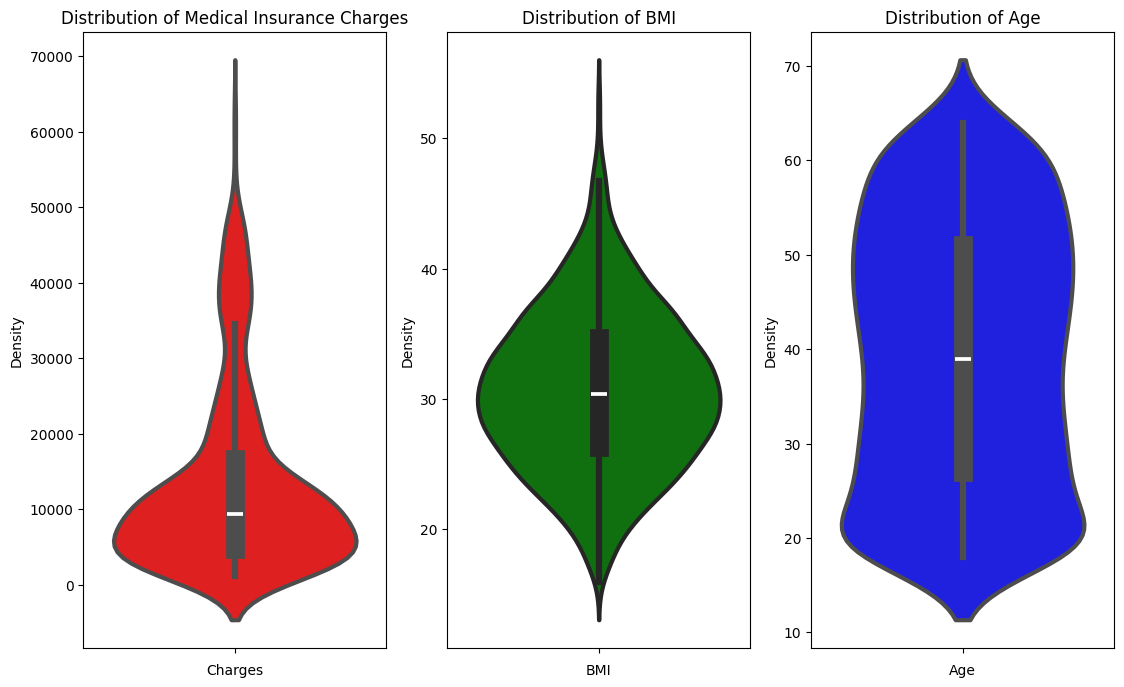

In [35]:
# create a figure with three subplots and set the figure size
plt.figure(figsize=(18, 8))

# plot 1: violin plot of medical insurance charges
plt.subplot(1, 4, 1)

# set the title and labels of the first subplot
plt.title("Distribution of Medical Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Density")

# create violin plot
sns.violinplot(y="charges", data=df, color="red", linewidth=3)

# plot 2: violin plot of BMI scores
plt.subplot(1, 4, 2)

# set the title and labels of the second subplot
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Density")

# create violin plot
sns.violinplot(y="bmi", data=df, color="green", linewidth=3)

# plot 3: violin plot of age scores
plt.subplot(1, 4, 3)

# set the title and labels of the third subplot
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Density")

# create violin plot
sns.violinplot(y="age", data=df, color="blue", linewidth=3)

plt.show()

##### Insights

- From the above three plots its clearly visible that the maximum number of individuals are charged between 0 to 20000. And the maximum number of individuals have BMI between 25 to 35. And for the ages, the maximum number of individuals are well distributed between 18 to 64.


#### 4.3 Multivariate analysis using pieplot


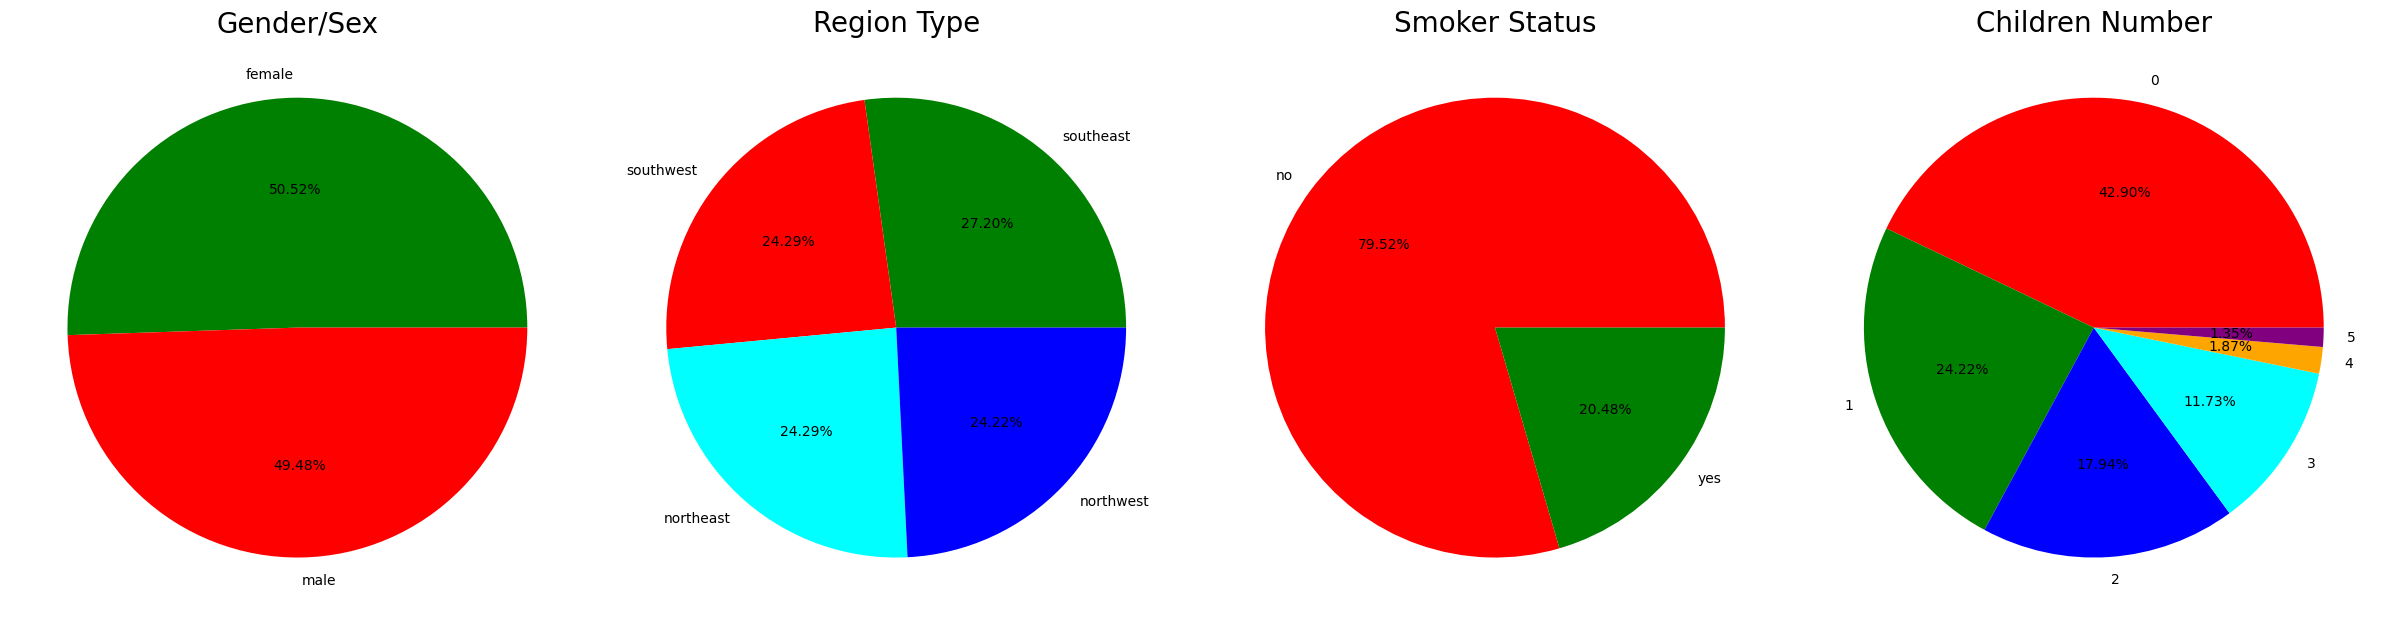

In [36]:
# set the size of the figure
plt.rcParams["figure.figsize"] = (30, 12)

# create the first subplot with a pie chart of gender/sex
plt.subplot(1, 5, 1)
size = df["sex"].value_counts()
labels = ["female", "male"]
colors = ["green", "red"]
plt.pie(size, colors=colors, labels=labels, autopct="%.2f%%")
plt.title("Gender/Sex", fontsize=20)
plt.axis("off")

# create the second subplot with a pie chart of region
plt.subplot(1, 5, 2)
size = df["region"].value_counts()
labels = ["southeast", "southwest", "northeast", "northwest"]
colors = ["green", "red", "cyan", "blue"]
plt.pie(size, colors=colors, labels=labels, autopct="%.2f%%")
plt.title("Region Type", fontsize=20)
plt.axis("off")

# create the third subplot with a pie chart of smoker status
plt.subplot(1, 5, 3)
size = df["smoker"].value_counts()
labels = ["no", "yes"]
colors = ["red", "green"]
plt.pie(size, colors=colors, labels=labels, autopct="%.2f%%")
plt.title("Smoker Status", fontsize=20)
plt.axis("off")

# create the fourth subplot with a pie chart of number of children
plt.subplot(1, 5, 4)
size = df["children"].value_counts()
labels = ["0", "1", "2", "3", "4", "5"]
colors = ["red", "green", "blue", "cyan", "orange", "purple"]
plt.pie(size, colors=colors, labels=labels, autopct="%.2f%%")
plt.title("Children Number", fontsize=20)
plt.axis("off")

# adjust the layout of the subplots and add a grid
plt.tight_layout()
plt.grid()

# show the plot
plt.show()

##### Insights

- Percentage of Male and Female personals is almost equal in the dataset.
- Most of the individuals are non-smokers (79.52%) and only 20.48% are smokers in the dataset.
- Region wise distribution of individuals is almost equal in the dataset just the southeast region has 27.2% of the individuals which is slightly higher than the other regions.
- In Children wise distribution of individuals, 42.9% of the individuals have no children which is the highest among all the categories. And 24.22% of the individuals have 1 child, 17.94% have 2 children, 11.73% have 3 children, 1.87% have 4 children and 1.35% have 5 children.


#### 4.4 Feature Wise Visualization


##### 4.4.1 SEX COLUMN

- How is distribution of Gender/Sex ?
- Is gender has any impact on medical insurance charges ?

UNIVARIATE ANALYSIS ( How is distribution of Gender/Sex ? )


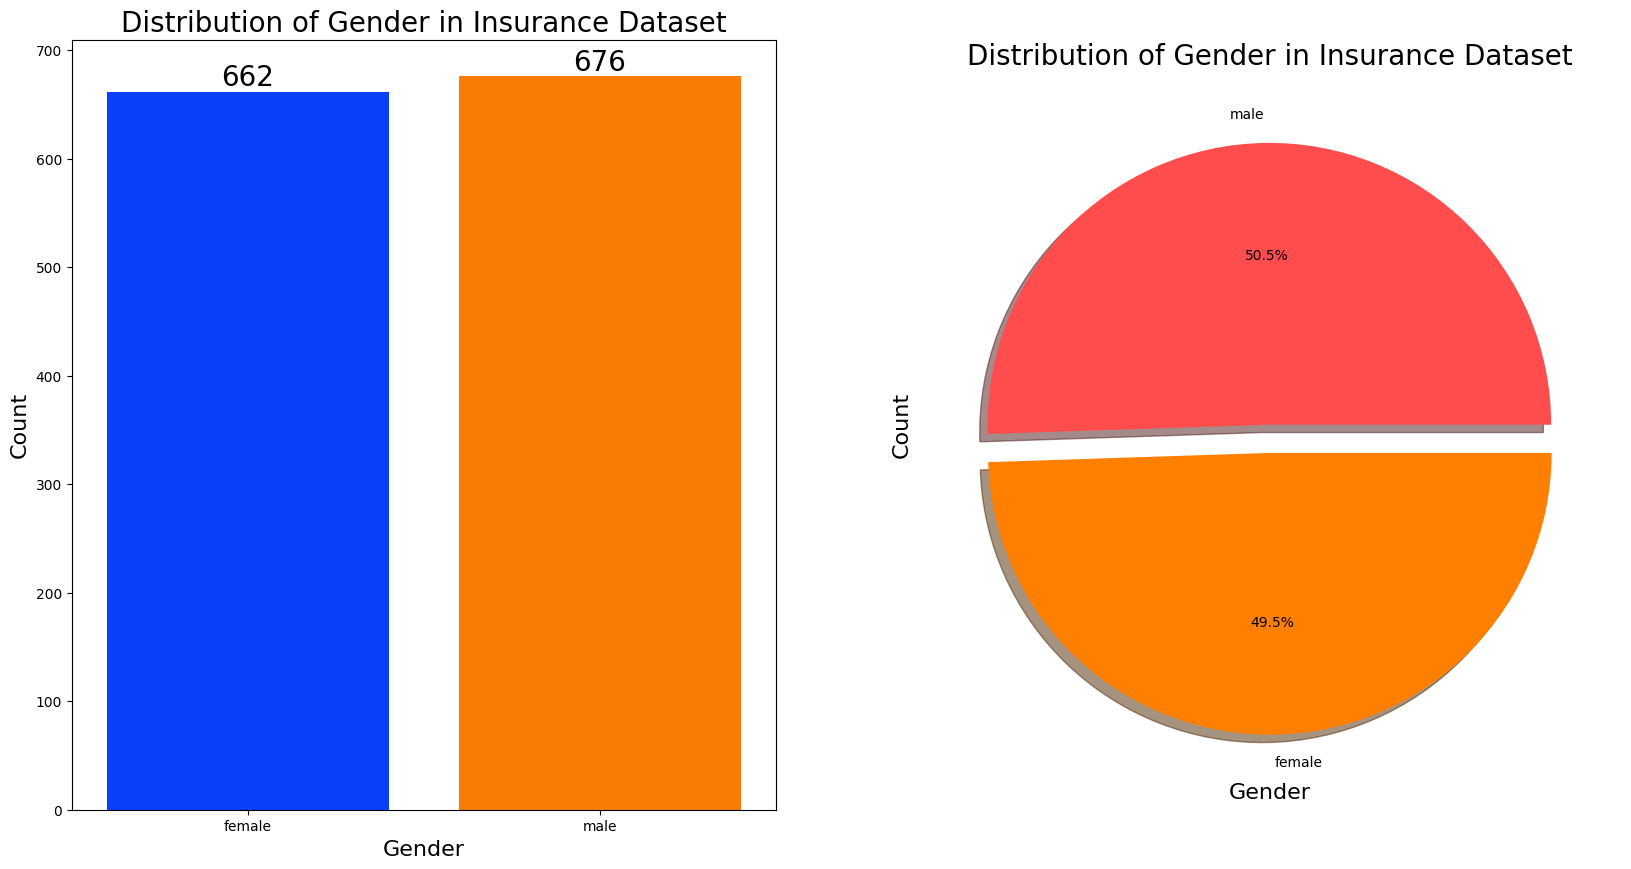

In [37]:
# create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# plot countplot
sns.countplot(x=df["sex"], data=df, palette="bright", ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)

# set title and labels for countplot
ax[0].set_title("Distribution of Gender in Insurance Dataset", fontsize=20)
ax[0].set_xlabel("Gender", fontsize=16)
ax[0].set_ylabel("Count", fontsize=16)

# plot pie chart
plt.pie(
    x=df["sex"].value_counts(),
    labels=["male", "female"],
    explode=[0, 0.1],
    autopct="%1.1f%%",
    shadow=True,
    colors=["#ff4d4d", "#ff8000"],
)

# set title and labels for pie chart
plt.title("Distribution of Gender in Insurance Dataset", fontsize=20)
plt.xlabel("Gender", fontsize=16)
plt.ylabel("Count", fontsize=16)

plt.show()

Insights

- Gender has balanced data with females are 662 (49.5%) and male personals are 676 (50.5%).
- So, the data is balanced.


BIVARIATE ANALYSIS (Is gender/sex has any impact on medical charges ?)


In [38]:
# group the data by gender and calculate the mean of the charges column
charges_by_gender = df.groupby("sex")["charges"].mean()

# print the result rounded to 2 decimal places
print(f"Average charges for male: {charges_by_gender['male']:.2f}")
print(f"Average charges for female: {charges_by_gender['female']:.2f}")

Average charges for male: 13956.75
Average charges for female: 12569.58


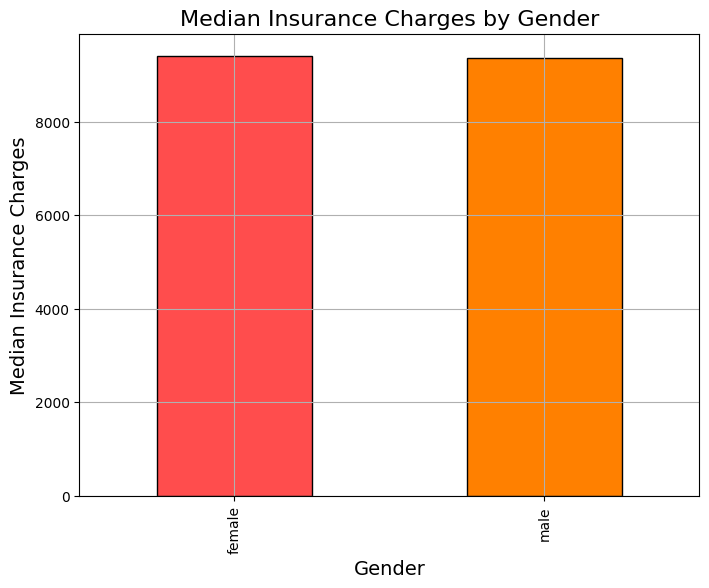

In [39]:
# set the figure size
plt.figure(figsize=(8, 6))

# plot median insurance charges for male and female individuals
df.groupby("sex")["charges"].median().plot(
    kind="bar", color=["#ff4d4d", "#ff8000"], edgecolor="black", linewidth=1, grid=True
)

# set the x-axis label, y-axis label, and title
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Median Insurance Charges", fontsize=14)
plt.title("Median Insurance Charges by Gender", fontsize=16)

# show the plot
plt.show()

Insights

- On an average both male and female personals are charged almost same.


##### 4.4.2 CHILDREN COLUMN

- How is Children wise distribution ?
- Is Children number has any impact on medical insurance charges ?


UNIVARIATE ANALYSIS ( How is Children number wise distribution ?)


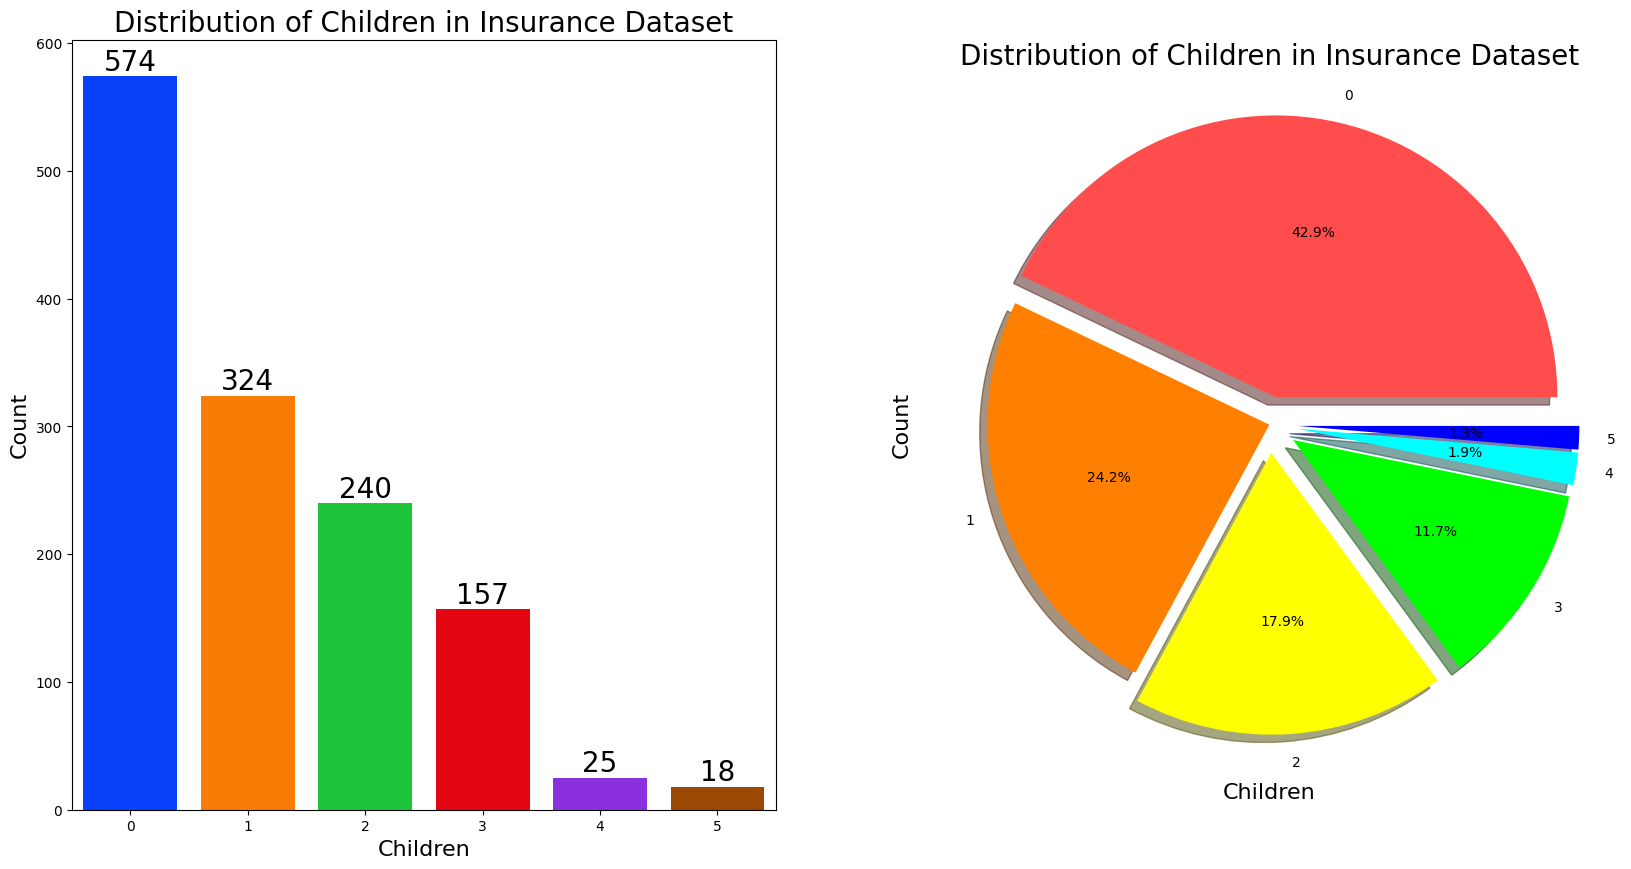

In [40]:
# create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# plot countplot
sns.countplot(x=df["children"], data=df, palette="bright", ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)

# set title and labels for countplot
ax[0].set_title("Distribution of Children in Insurance Dataset", fontsize=20)
ax[0].set_xlabel("Children", fontsize=16)
ax[0].set_ylabel("Count", fontsize=16)

# plot pie chart
plt.pie(
    x=df["children"].value_counts(),
    labels=["0", "1", "2", "3", "4", "5"],
    explode=[0.1, 0, 0.1, 0.1, 0.1, 0.1],
    autopct="%1.1f%%",
    shadow=True,
    colors=["#ff4d4d", "#ff8000", "#ffff00", "#00ff00", "#00ffff", "#0000ff"],
)

# set title and labels for pie chart
plt.title("Distribution of Children in Insurance Dataset", fontsize=20)
plt.xlabel("Children", fontsize=16)
plt.ylabel("Count", fontsize=16)

plt.show()

Insights

- 42.9% of the individuals have no children which is the highest among all the categories.
- 24.22% of the individuals have 1 child, 17.94% have 2 children, 11.73% have 3 children, 1.87% have 4 children and 1.35% have 5 children.
- So, most of the individuals have no children.
- Very few individuals have 4 and 5 children.


BIVARIATE ANALYSIS ( Is children number has any impact on medical charges ? )


In [41]:
# group the data by gender and calculate the mean of the charges column
charges_by_children = df.groupby("children")["charges"].mean()

# print the result rounded to 2 decimal places
print(
    f"Average charges for personals having no(0) children: {charges_by_children[0]:.2f}"
)
print(f"Average charges for personals having 1 children: {charges_by_children[1]:.2f}")
print(f"Average charges for personals having 2 children: {charges_by_children[2]:.2f}")
print(f"Average charges for personals having 3 children: {charges_by_children[3]:.2f}")
print(f"Average charges for personals having 4 children: {charges_by_children[4]:.2f}")
print(f"Average charges for personals having 5 children: {charges_by_children[5]:.2f}")

Average charges for personals having no(0) children: 12365.98
Average charges for personals having 1 children: 12731.17
Average charges for personals having 2 children: 15073.56
Average charges for personals having 3 children: 15355.32
Average charges for personals having 4 children: 13850.66
Average charges for personals having 5 children: 8786.04


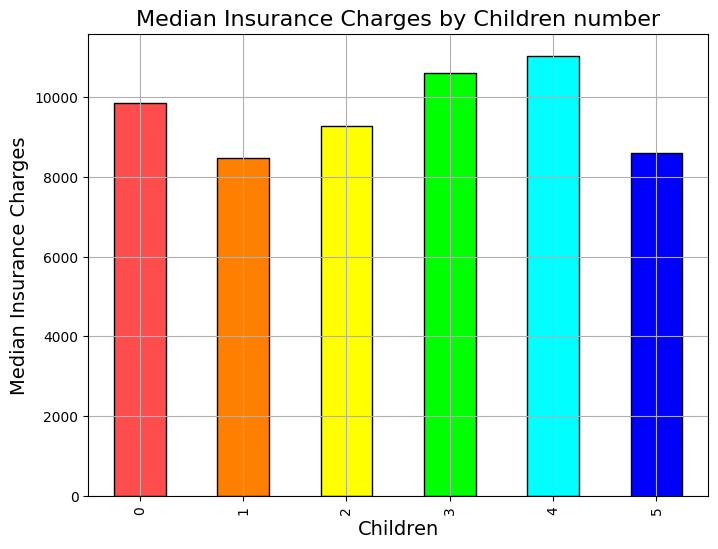

In [42]:
# set the figure size
plt.figure(figsize=(8, 6))

# plot median insurance charges for male and female individuals
df.groupby("children")["charges"].median().plot(
    kind="bar",
    color=["#ff4d4d", "#ff8000", "#ffff00", "#00ff00", "#00ffff", "#0000ff"],
    edgecolor="black",
    linewidth=1,
    grid=True,
)

# set the x-axis label, y-axis label, and title
plt.xlabel("Children", fontsize=14)
plt.ylabel("Median Insurance Charges", fontsize=14)
plt.title("Median Insurance Charges by Children number", fontsize=16)

# show the plot
plt.show()

Insights

- The average insurance charge for individuals with three children (children=3) is $15,355.32, which is the highest among all the categories. The average insurance charge for individuals with five children (children=5) is the lowest among all the categories.


##### 4.4.3 REGION COLUMN

- How is Region wise distribution ?
- Is Region has any impact on medical insurance charges ?


UNIVARIATE ANALYSIS ( How is region wise distribution ?)


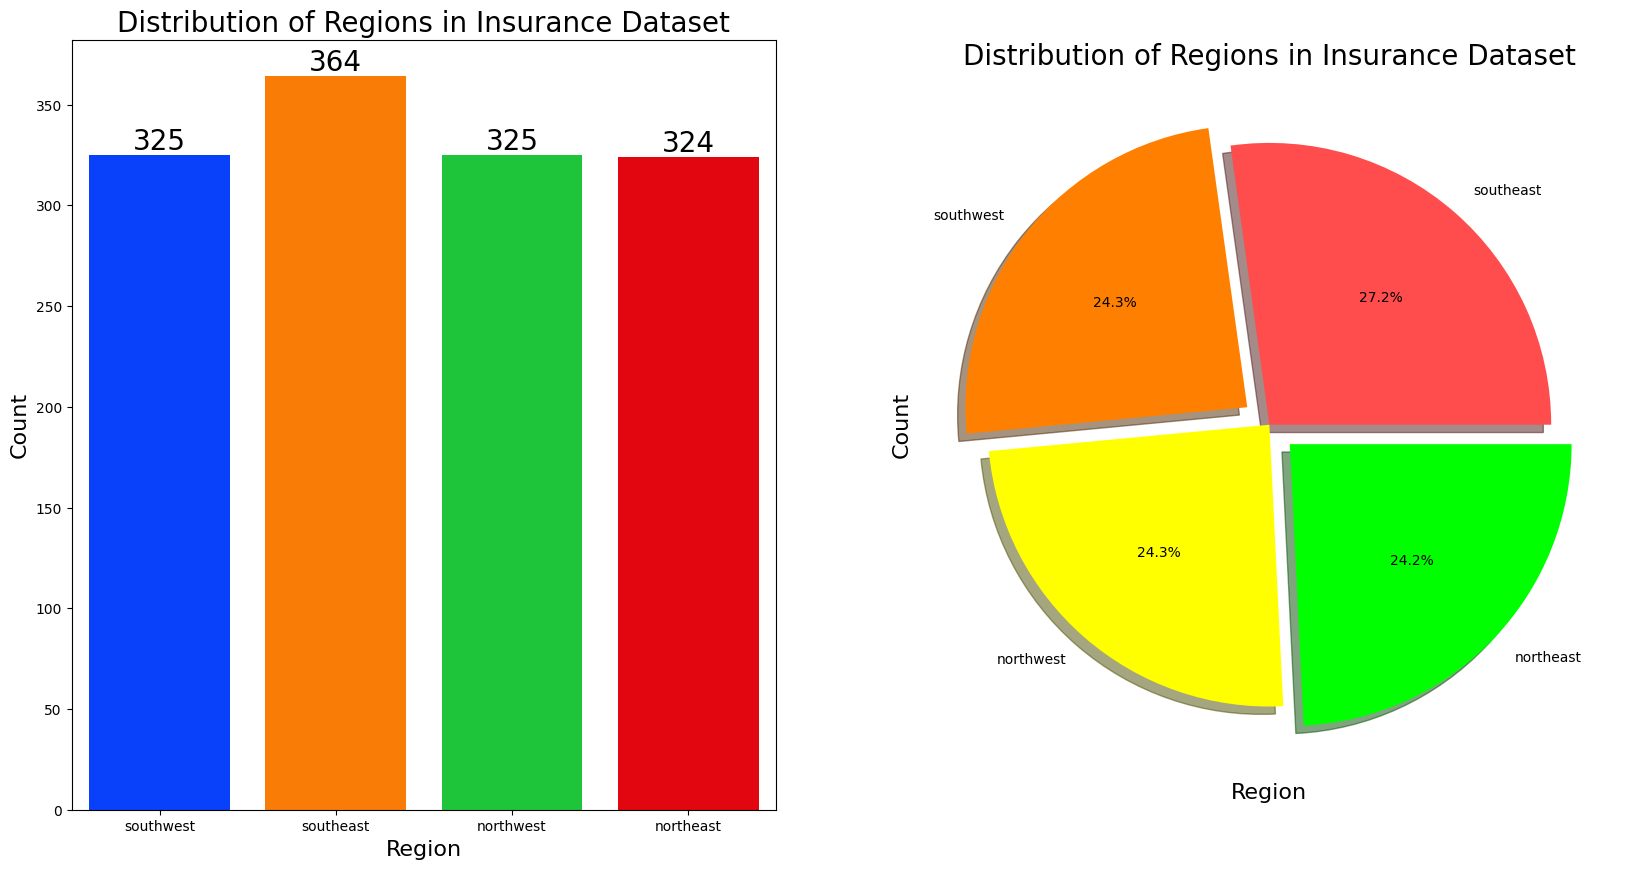

In [43]:
# create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# plot countplot
sns.countplot(x=df["region"], data=df, palette="bright", ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)

# set title and labels for countplot
ax[0].set_title("Distribution of Regions in Insurance Dataset", fontsize=20)
ax[0].set_xlabel("Region", fontsize=16)
ax[0].set_ylabel("Count", fontsize=16)

# plot pie chart
plt.pie(
    x=df["region"].value_counts(),
    labels=["southeast", "southwest", "northwest", "northeast"],
    explode=[0, 0.1, 0, 0.1],
    autopct="%1.1f%%",
    shadow=True,
    colors=["#ff4d4d", "#ff8000", "#ffff00", "#00ff00"],
)

# set title and labels for pie chart
plt.title("Distribution of Regions in Insurance Dataset", fontsize=20)
plt.xlabel("Region", fontsize=16)
plt.ylabel("Count", fontsize=16)

plt.show()

Insights

- Region wise distribution of individuals is almost equal in the dataset just the southeast region has 27.2% of the individuals which is slightly higher than the other regions.


BIVARIATE ANALYSIS (Is region has any impact on medical charges ?)


In [44]:
# group the data by region and calculate the mean of the charges column
charges_by_region = df.groupby("region")["charges"].mean()

# print the result rounded to 2 decimal places
print(
    f"Average charges for personals in region southwest: {charges_by_region['southwest']:.2f}"
)
print(
    f"Average charges for personals in region northwest: {charges_by_region['northwest']:.2f}"
)
print(
    f"Average charges for personals in region southeast: {charges_by_region['southeast']:.2f}"
)
print(
    f"Average charges for personals in region northeast: {charges_by_region['northeast']:.2f}"
)

Average charges for personals in region southwest: 12346.94
Average charges for personals in region northwest: 12417.58
Average charges for personals in region southeast: 14735.41
Average charges for personals in region northeast: 13406.38


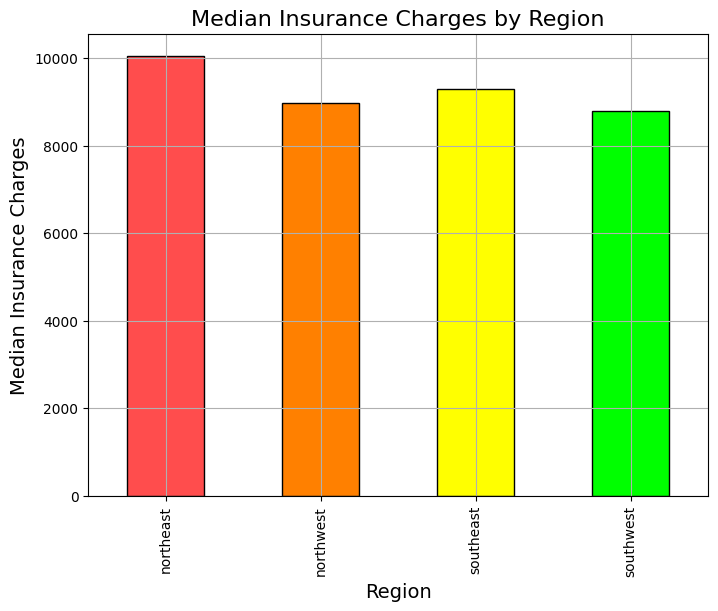

In [45]:
# set the figure size
plt.figure(figsize=(8, 6))

# plot median insurance charges for male and female individuals
df.groupby("region")["charges"].median().plot(
    kind="bar",
    color=["#ff4d4d", "#ff8000", "#ffff00", "#00ff00"],
    edgecolor="black",
    linewidth=1,
    grid=True,
)

# set the x-axis label, y-axis label, and title
plt.xlabel("Region", fontsize=14)
plt.ylabel("Median Insurance Charges", fontsize=14)
plt.title("Median Insurance Charges by Region", fontsize=16)

# show the plot
plt.show()

Insights

- The southeast region has the highest average insurance charges, while the southwest region has the lowest average insurance charges.


##### 4.4.4 SMOKER COLUMN

- How is SMOKER wise distribution ?
- Is SMOKER type has any impact on medical insurance charges ?


UNIVARIATE ANALYSIS (How is SMOKER wise distribution ?)


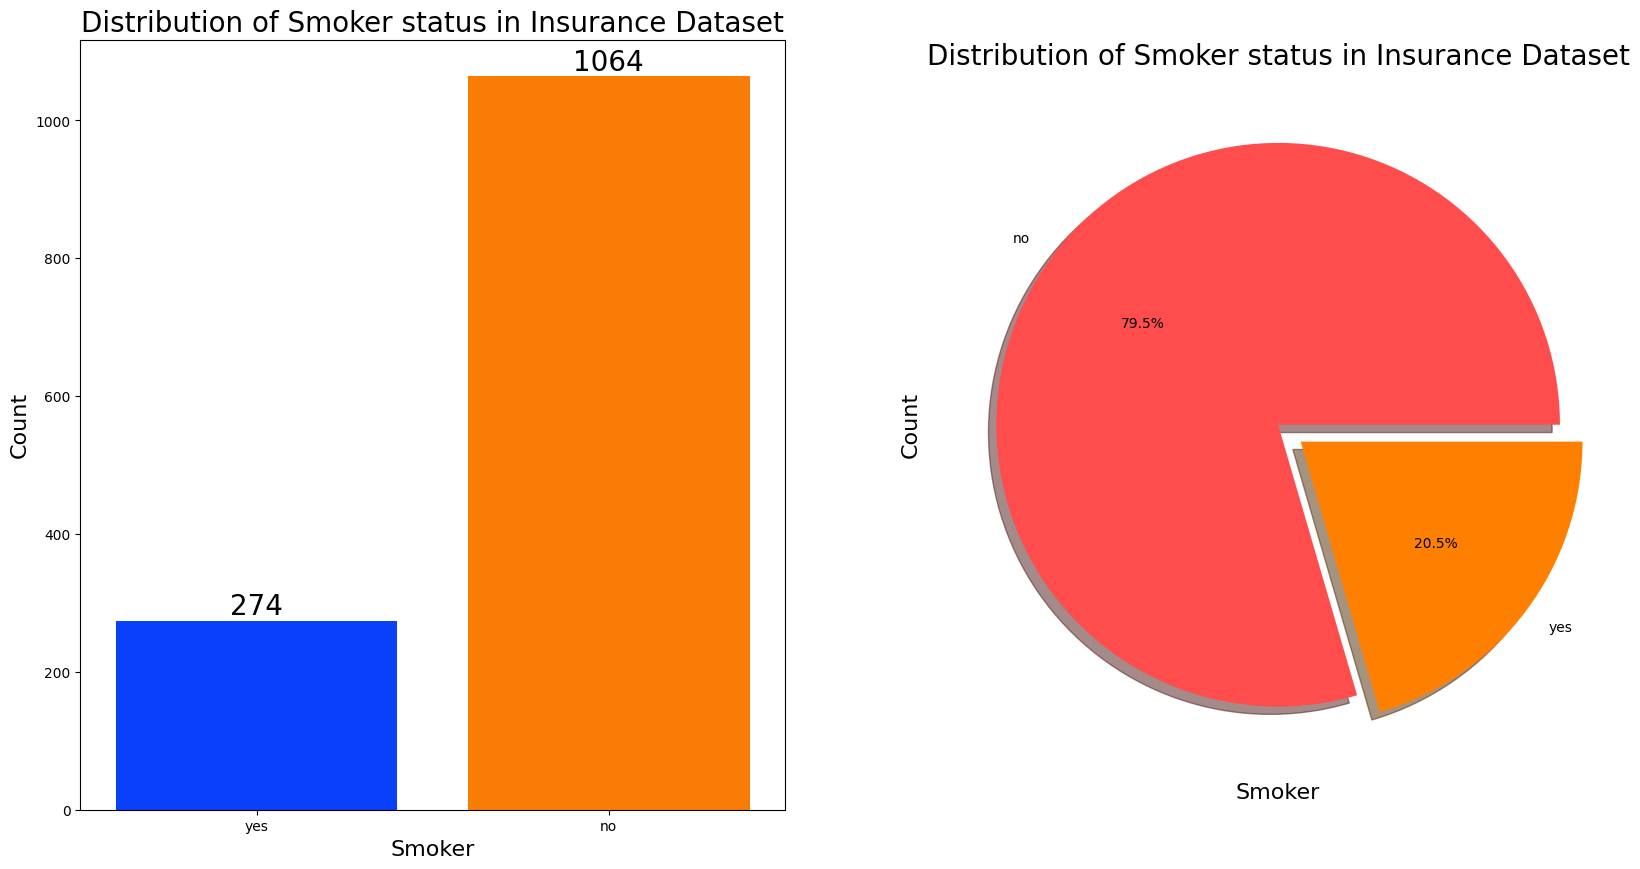

In [46]:
# create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# plot countplot
sns.countplot(x=df["smoker"], data=df, palette="bright", ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color="black", size=20)

# set title and labels for countplot
ax[0].set_title("Distribution of Smoker status in Insurance Dataset", fontsize=20)
ax[0].set_xlabel("Smoker", fontsize=16)
ax[0].set_ylabel("Count", fontsize=16)

# plot pie chart
plt.pie(
    x=df["smoker"].value_counts(),
    labels=["no", "yes"],
    explode=[0, 0.1],
    autopct="%1.1f%%",
    shadow=True,
    colors=["#ff4d4d", "#ff8000"],
)

# set title and labels for pie chart
plt.title("Distribution of Smoker status in Insurance Dataset", fontsize=20)
plt.xlabel("Smoker", fontsize=16)
plt.ylabel("Count", fontsize=16)

plt.show()

Insights

- Most of the individuals are non-smokers (79.52%) and only 20.48% are smokers in the dataset. So, majority of the individuals in the dataset are non-smokers.


BIVARIATE ANALYSIS (Is smoker status has any impact on medical charges ?)


In [47]:
# group the data by smoker and calculate the mean of the charges column
charges_by_smoker = df.groupby("smoker")["charges"].mean()

# print the result rounded to 2 decimal places
print(f"Average charges for smokers: {charges_by_smoker['yes']:.2f}")
print(f"Average charges for non-smokers: {charges_by_smoker['no']:.2f}")

Average charges for smokers: 32050.23
Average charges for non-smokers: 8434.27


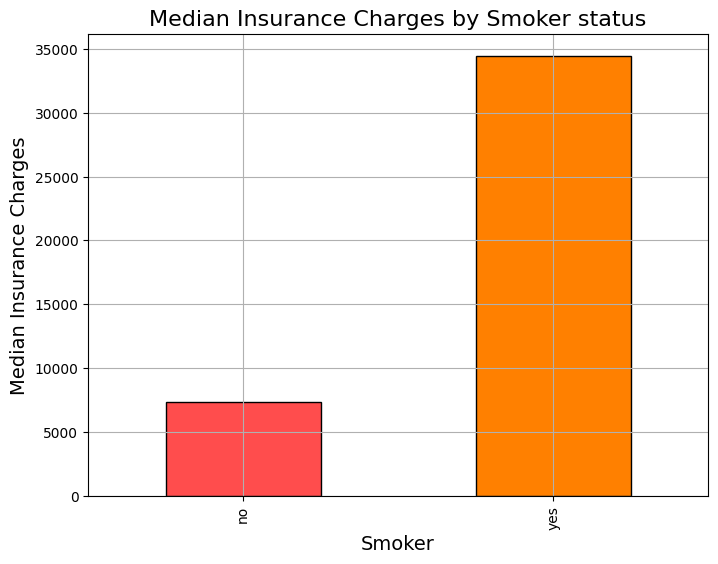

In [48]:
# set the figure size
plt.figure(figsize=(8, 6))

# plot median insurance charges for male and female individuals
df.groupby("smoker")["charges"].median().plot(
    kind="bar",
    color=["#ff4d4d", "#ff8000"],
    edgecolor="black",
    linewidth=1,
    grid=True,
)

# set the x-axis label, y-axis label, and title
plt.xlabel("Smoker", fontsize=14)
plt.ylabel("Median Insurance Charges", fontsize=14)
plt.title("Median Insurance Charges by Smoker status", fontsize=16)

# show the plot
plt.show()

Insights

- Smokers tend to have higher insurance charges on average compared to non-smokers in the dataset. The average insurance charge for smokers is $32,050.23, which is more than double the average insurance charge for non-smokers ($8,434.27). This is clearly visible from the above plot. So, smoking has a significant impact on the insurance charges. Smokers are charged more than non-smokers.


##### 4.4.5 BMI COLUMN

- How is BMI index wise distribution ?
- Is BMI index type has any impact on medical insurance charges ?


UNIVARIATE ANALYSIS (How is BMI wise distribution ?)


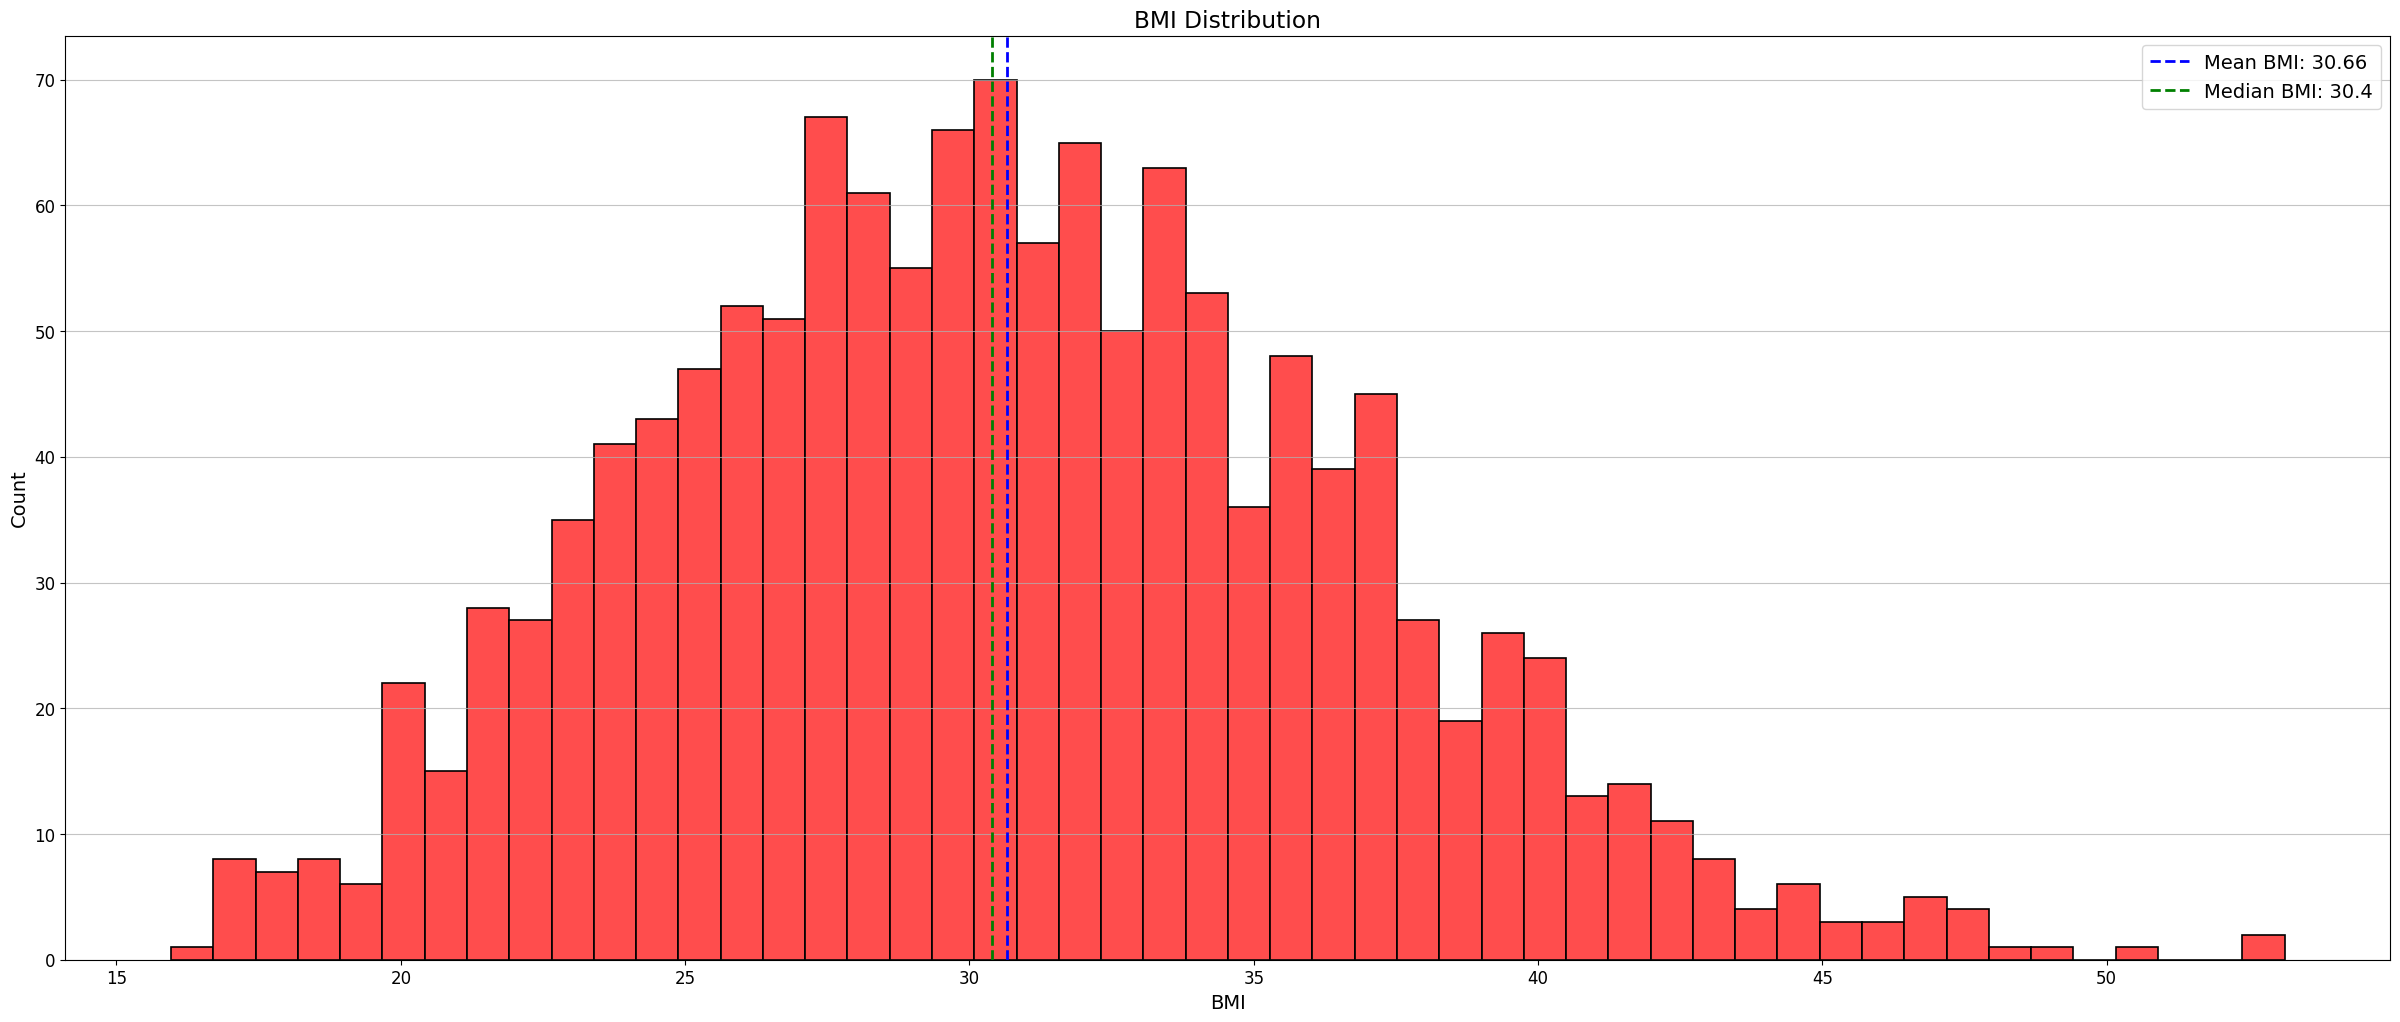

In [49]:
# set font size
plt.rcParams.update({"font.size": 14})

# plot histogram of BMI column
plt.hist(df["bmi"], bins=50, color="#ff4d4d", edgecolor="black", linewidth=1.2)

# calculate and plot mean and median BMI values
mean_bmi = df["bmi"].mean()
median_bmi = df["bmi"].median()
plt.axvline(
    mean_bmi,
    color="blue",
    linestyle="dashed",
    linewidth=2,
    label=f"Mean BMI: {mean_bmi:.2f}",
)
plt.axvline(
    median_bmi,
    color="green",
    linestyle="dashed",
    linewidth=2,
    label=f"Median BMI: {median_bmi}",
)

# set x-label, y-label, and title
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI Distribution")

# add legend
plt.legend()

# improve visualization
plt.grid(axis="y", alpha=0.75)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# show the plot
plt.show()

Insights

- The distribution of BMI values is approximately normal. This suggests that most individuals in the dataset have a BMI in the overweight range. The distribution is centered around the average BMI value of approximately 30.


BIVARIATE ANALYSIS (Is BMI has any impact on personals medical charges ?)


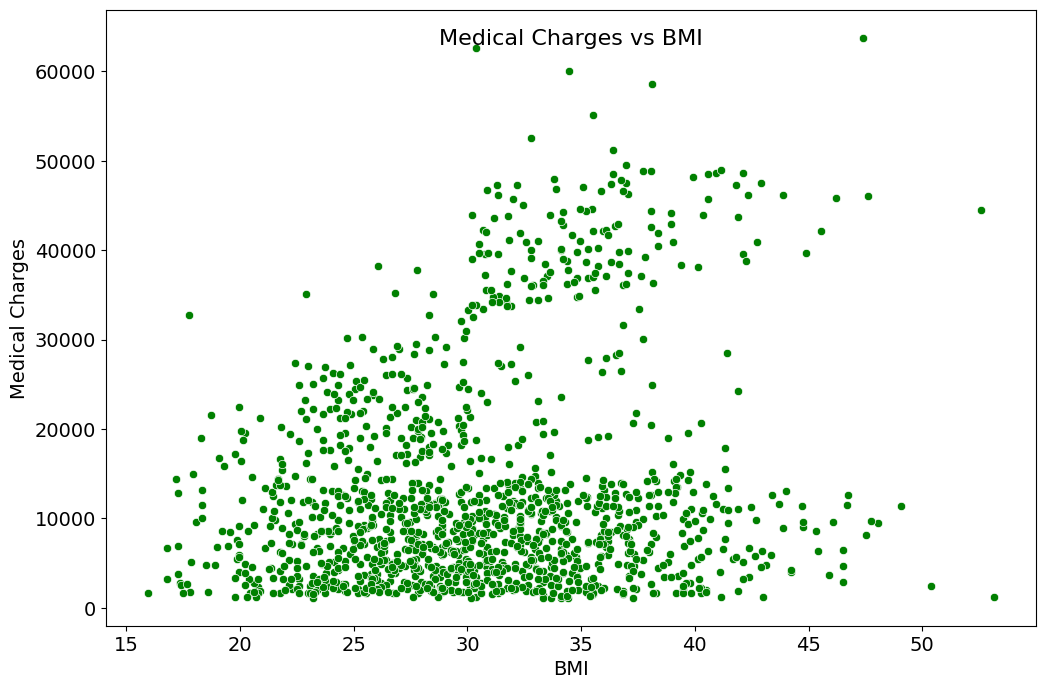

In [50]:
# figure size
plt.figure(figsize=(12, 8))

# scatter plot of charges vs bmi
sns.scatterplot(data=df, x="bmi", y="charges", color="g")

# plot title little down from the top of the plot
plt.title("Medical Charges vs BMI", y=0.93, fontsize=16)
plt.xlabel("BMI", fontsize=14)
plt.ylabel("Medical Charges", fontsize=14)

# show the plot
plt.show()

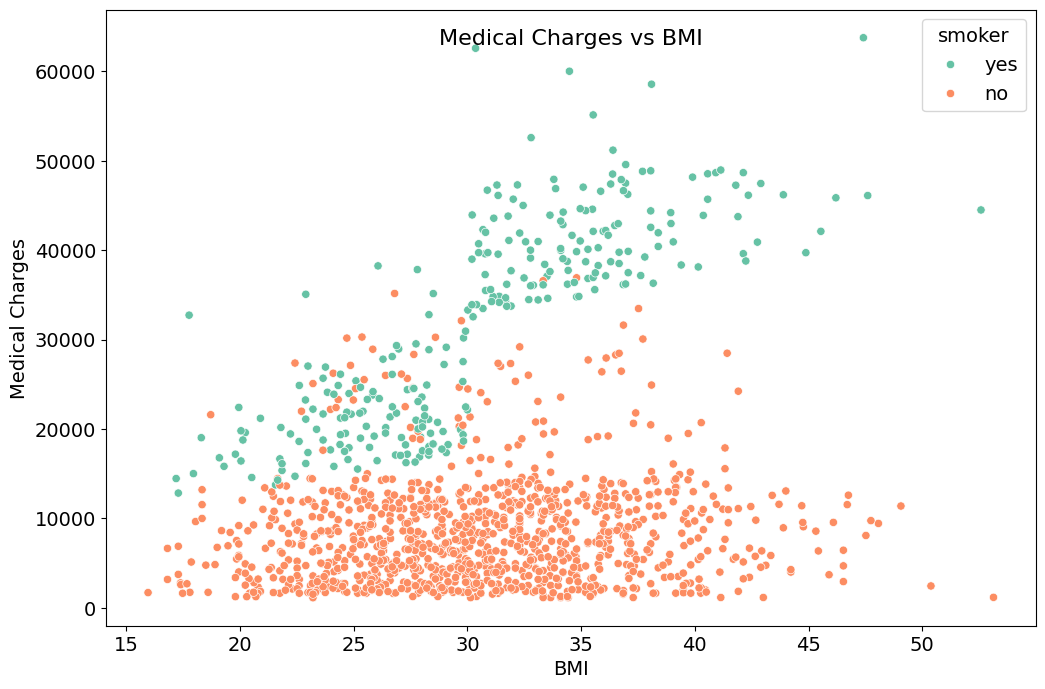

In [51]:
# figure size
plt.figure(figsize=(12, 8))

# scatter plot of charges vs bmi
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker", palette="Set2")

# plot title little down from the top of the plot
plt.title("Medical Charges vs BMI", y=0.93, fontsize=16)
plt.xlabel("BMI", fontsize=14)
plt.ylabel("Medical Charges", fontsize=14)

# show the plot
plt.show()

Insights

- The average insurance charge for individuals with BMI > 30 (considered overweight) is higher than the average insurance charge for individuals with healthy BMI (18.5 to 24.9). This is clearly visible from the above plot. So, BMI has a significant impact on the insurance charges.


##### 4.4.6 AGE COLUMN

- How is Age wise distribution ?
- Is Age has any impact on medical insurance charges ?


UNIVARIATE ANALYSIS (How is Age wise distribution ?)

Evaluate the code and check if need anything more or tell what to do with age data distribution visualization. Also as always make the code better.


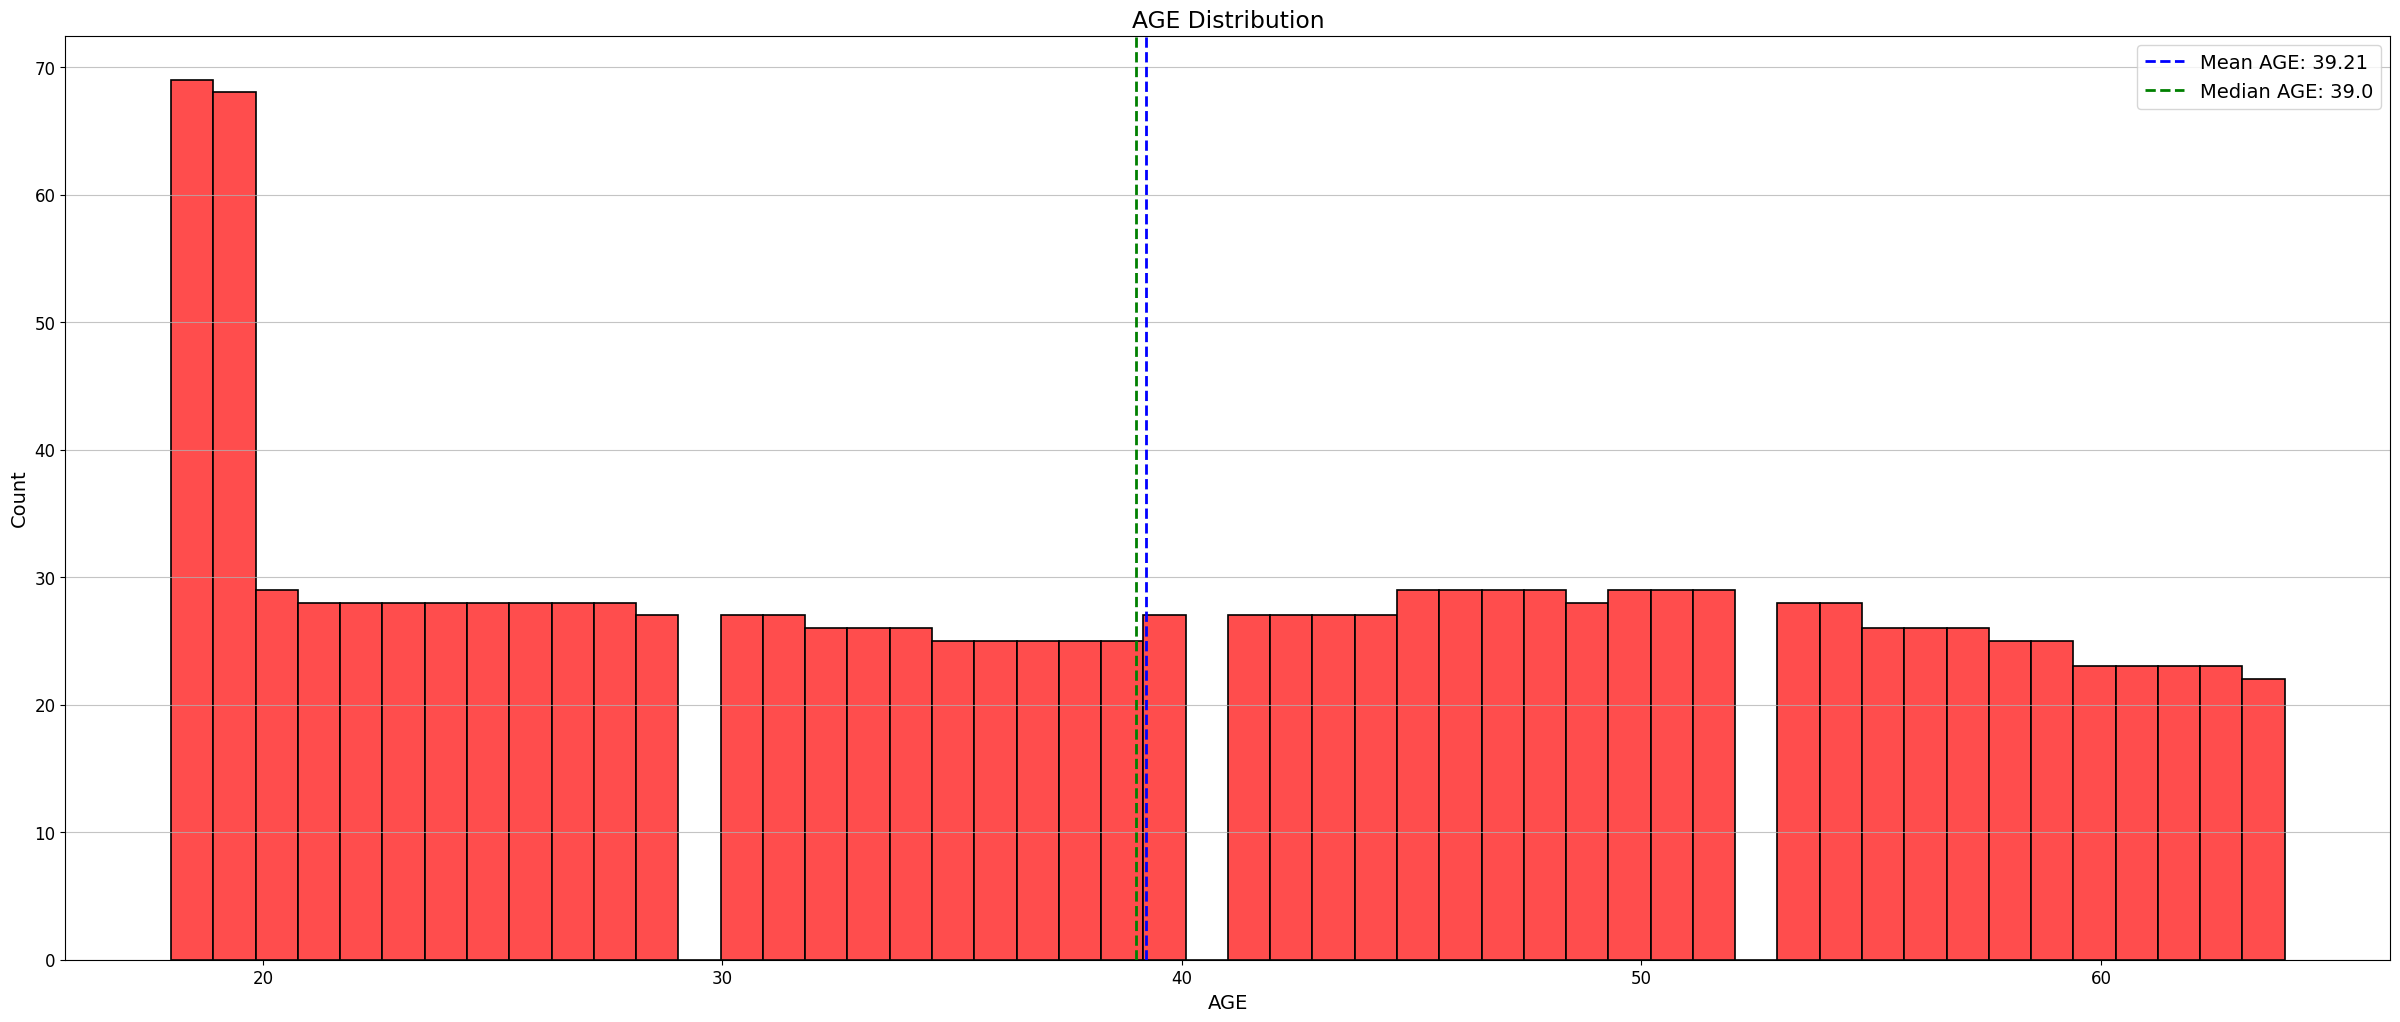

In [52]:
# plot histogram of age column
plt.hist(df["age"], bins=50, color="#ff4d4d", edgecolor="black", linewidth=1.2)

# calculate and plot mean and median age values
mean_age = df["age"].mean()
median_age = df["age"].median()
plt.axvline(
    mean_age,
    color="blue",
    linestyle="dashed",
    linewidth=2,
    label=f"Mean AGE: {mean_age:.2f}",
)
plt.axvline(
    median_age,
    color="green",
    linestyle="dashed",
    linewidth=2,
    label=f"Median AGE: {median_age}",
)

# set x-label, y-label, and title
plt.xlabel("AGE")
plt.ylabel("Count")
plt.title("AGE Distribution")

# add legend
plt.legend()

# improve visualization
plt.grid(axis="y", alpha=0.75)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# show the plot
plt.show()

Insights

- Distribution of age is not normal. It is right skewed.And the number of individuals decreases as the age increases. So, most of the individuals are young.So, most of the individuals are young and the average age of the individuals is 39.


BIVARIATE ANALYSIS (Is BMI has any impact on personals medical charges ?)


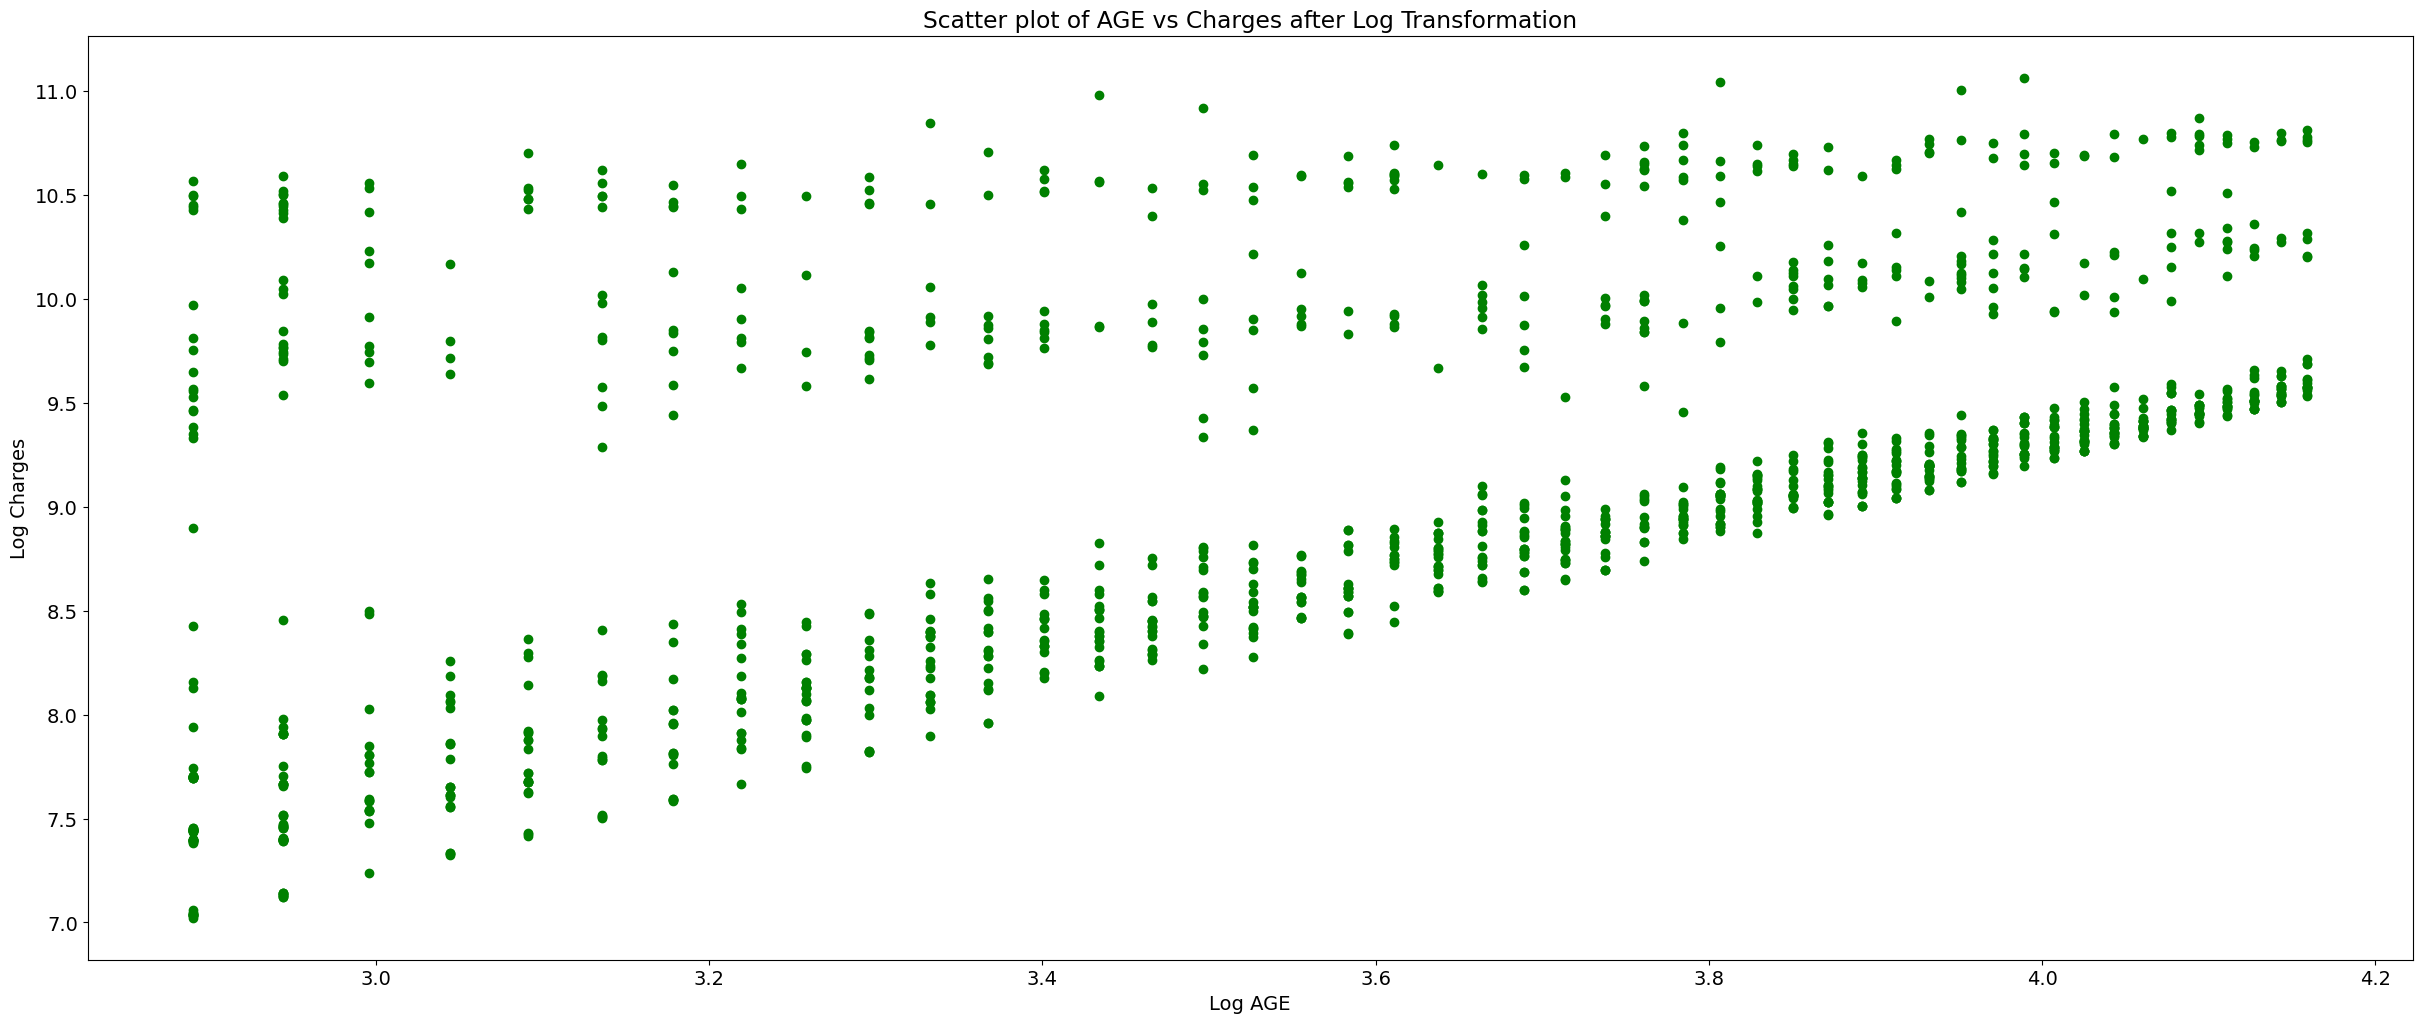

In [53]:
# create a copy of the original dataframe
data = df.copy()

# check if 0 is present in the unique values of the "bmi" column
if 0 not in data["age"].unique():
    # perform a log transformation on "bmi" and "charges" columns
    data["age"] = np.log(data["age"])
    data["charges"] = np.log(data["charges"])

    # plot a scatter plot of "bmi" vs "charges" after log transformation
    plt.scatter(data["age"], data["charges"], color="g")
    plt.title("Scatter plot of AGE vs Charges after Log Transformation")
    plt.xlabel("Log AGE")
    plt.ylabel("Log Charges")
    plt.show()

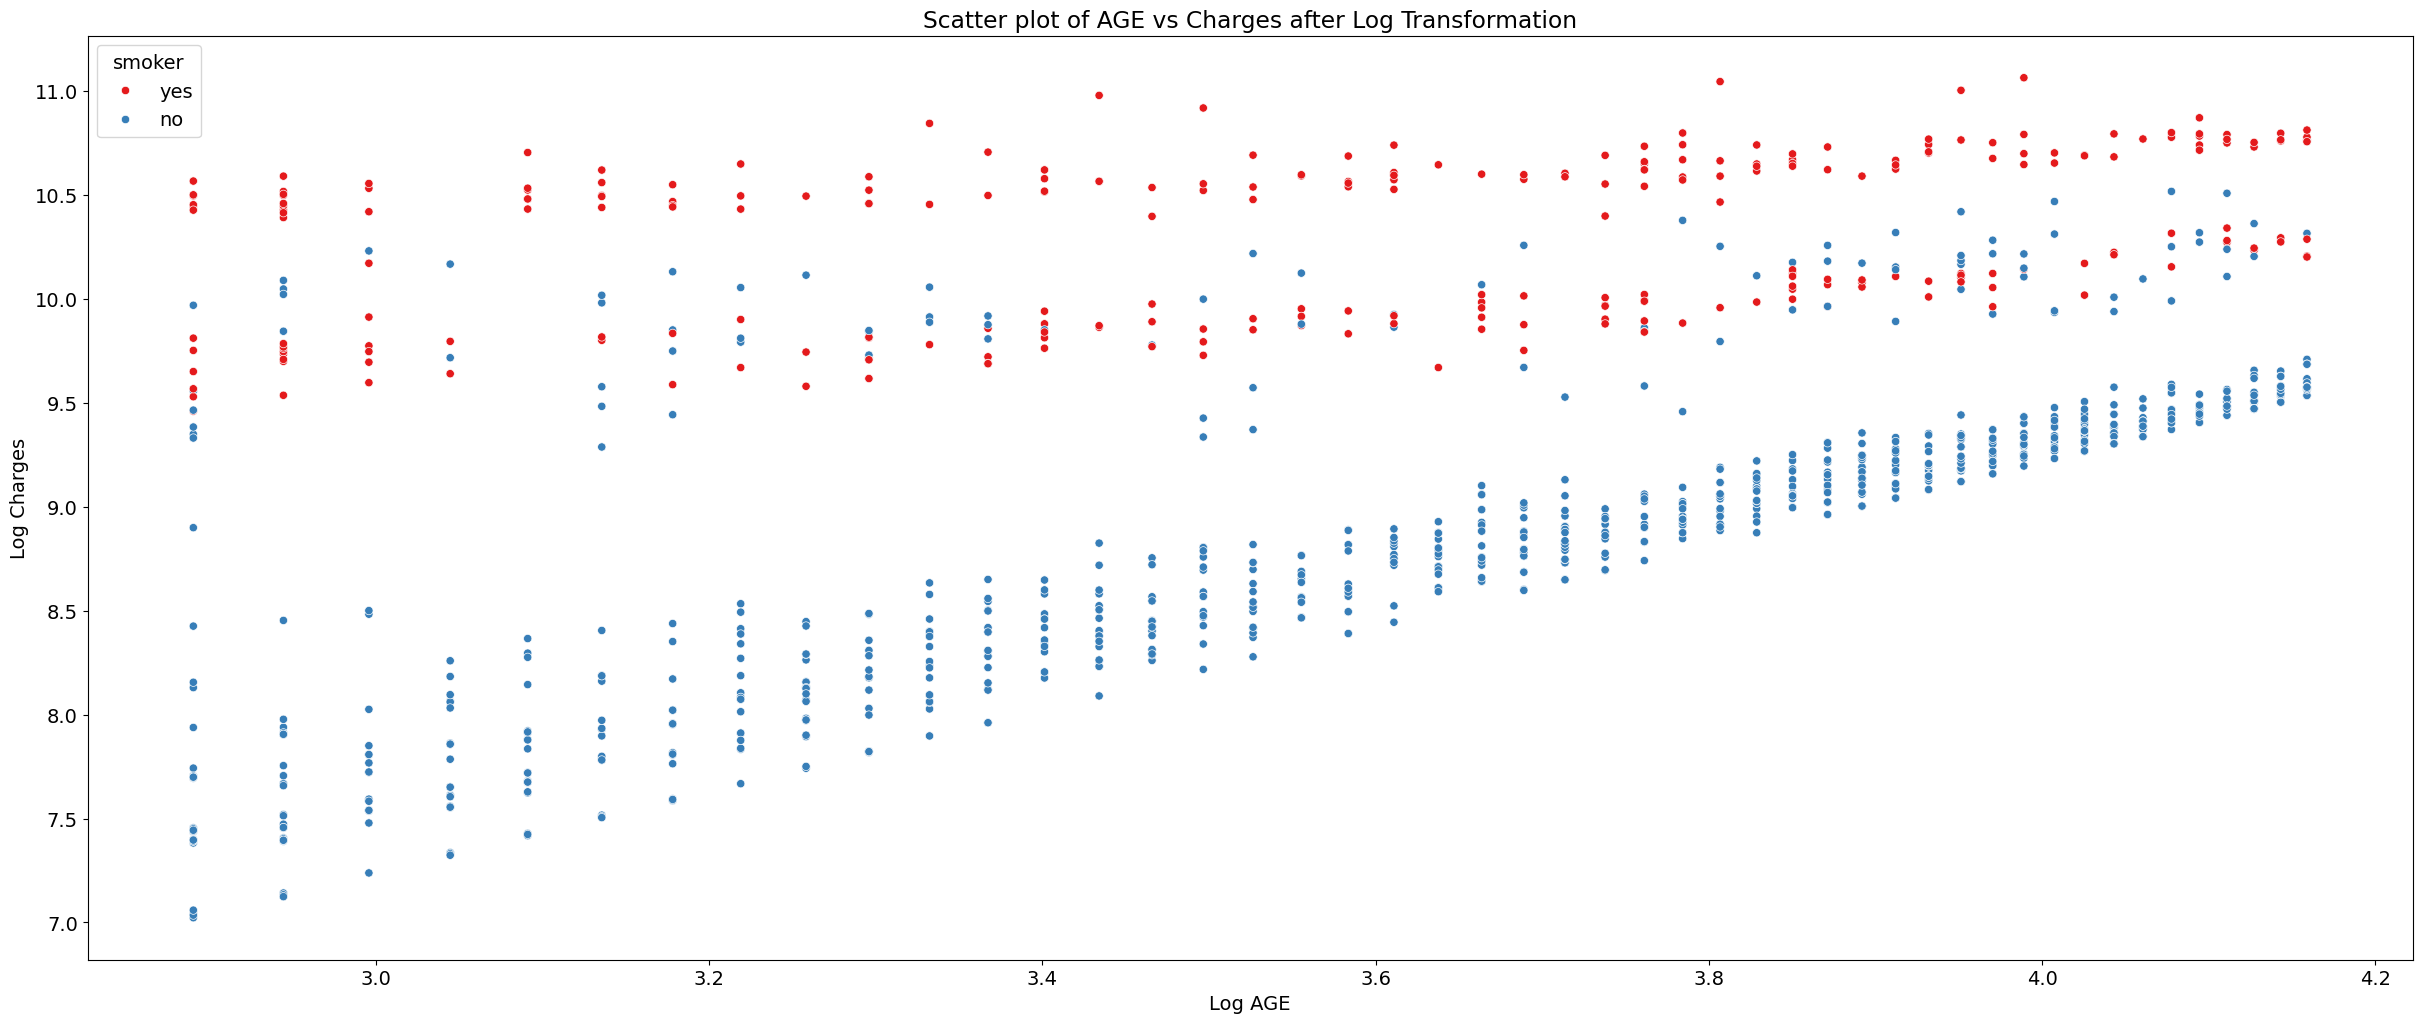

In [54]:
# create a copy of the original dataframe
data = df.copy()

# check if 0 is present in the unique values of the "age" column
if 0 not in data["age"].unique():
    # perform a log transformation on "age" and "charges" columns
    data["age"] = np.log(data["age"])
    data["charges"] = np.log(data["charges"])

    # plot a scatter plot of "bmi" vs "charges" after log transformation
    sns.scatterplot(data=data, x="age", y="charges", hue="smoker", palette="Set1")

    # plot title and labels
    plt.title("Scatter plot of AGE vs Charges after Log Transformation")
    plt.xlabel("Log AGE")
    plt.ylabel("Log Charges")
    plt.show()

Insights

- Relationship between age and insurance charges is not very clear from the above plot. But we can see that the number of individuals are more in the age group of 18 to 22 and the insurance charges are less for this age group. And the number of individuals are less in the age group of 60 to 64 and the insurance charges are more for this age group. So, we can say that age has a moderate impact on the insurance charges.


##### 4.4.7 CHECKING OUTLIERS


- Outliers in Continuous Variables


In [55]:
import scipy.stats as stats


def plot_variable_distribution(df, variable, dist_type="norm"):
    """
    Plots the distribution of a variable in a dataframe using a histogram, a Q-Q plot, and a boxplot.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the variable.
    variable (str): The name of the variable to plot.
    dist_type (str): The type of distribution to use for the Q-Q plot. Default is 'norm' for normal distribution.

    Returns:
    tuple: A tuple containing the histogram, Q-Q plot, and boxplot.
    """
    # Define figure size.
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title("Histogram")

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist=dist_type, plot=plt)
    plt.ylabel("Variable quantiles")

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title("Boxplot")

    plt.show()

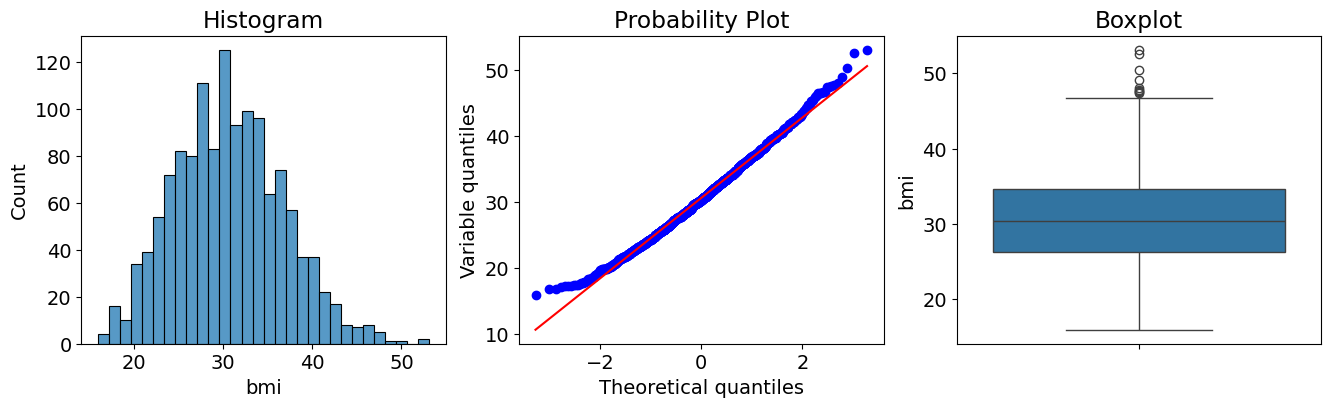

In [56]:
# plot the distribution of the "bmi" column
plot_variable_distribution(df, "bmi")

In [57]:
def find_normal_boundaries(df, variable):
    """
    Calculates the upper and lower boundaries for a normally distributed variable.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the variable.
    variable (str): The name of the variable to calculate the boundaries for.

    Returns:
    tuple: A tuple containing the upper and lower boundaries for the variable.
    """

    # Calculate the boundaries for a Gaussian distribution.
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [58]:
# find limits for bmi using the function
find_normal_boundaries(df, "bmi")

(48.95795759602359, 12.368836125949507)

In [59]:
# define the upper and lower boundaries for MedInc column
upper_boundary, lower_boundary = find_normal_boundaries(df, "bmi")

# count the number of houses with outliers
num_right_outliers = len(df[df["bmi"] > upper_boundary])
num_left_outliers = len(df[df["bmi"] < lower_boundary])

# calculate the percentage of houses with outliers
pct_right_outliers = num_right_outliers / len(df) * 100
pct_left_outliers = num_left_outliers / len(df) * 100

# print the results
print(f"Total number of bmi values: {len(df)}")
print(f"Number of bmi indexs right end outliers: {num_right_outliers}")
print(f"Number of bmi indexs left end outliers: {num_left_outliers}")
print("% of bmi indexs with right end outliers: {:.2f}%".format(pct_right_outliers))
print("% of bmi indexs left end outliers: {:.2f}%".format(pct_left_outliers))

Total number of bmi values: 1338
Number of bmi indexs right end outliers: 4
Number of bmi indexs left end outliers: 0
% of bmi indexs with right end outliers: 0.30%
% of bmi indexs left end outliers: 0.00%


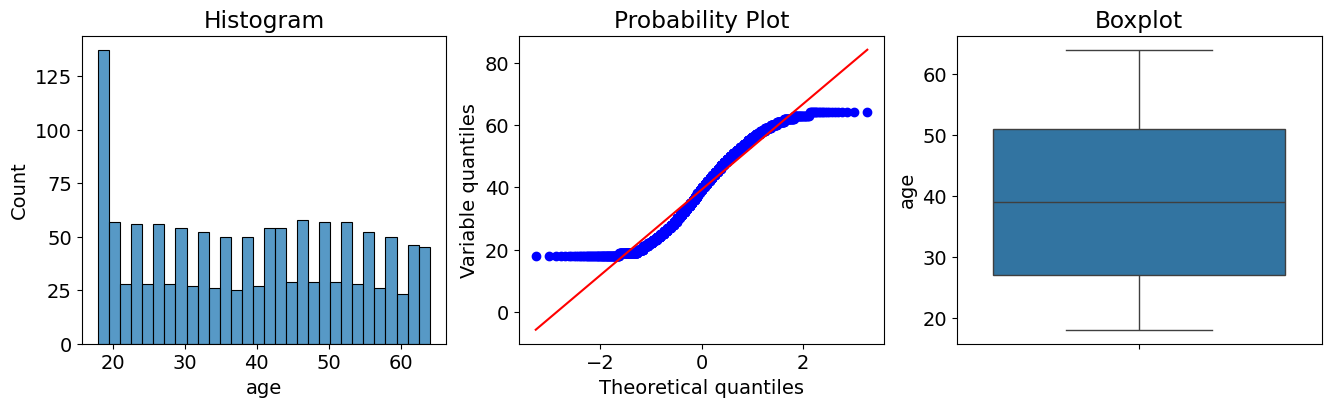

In [60]:
# plot the distribution of the "age" column
plot_variable_distribution(df, "age")

- Outliers in Discrete Variables


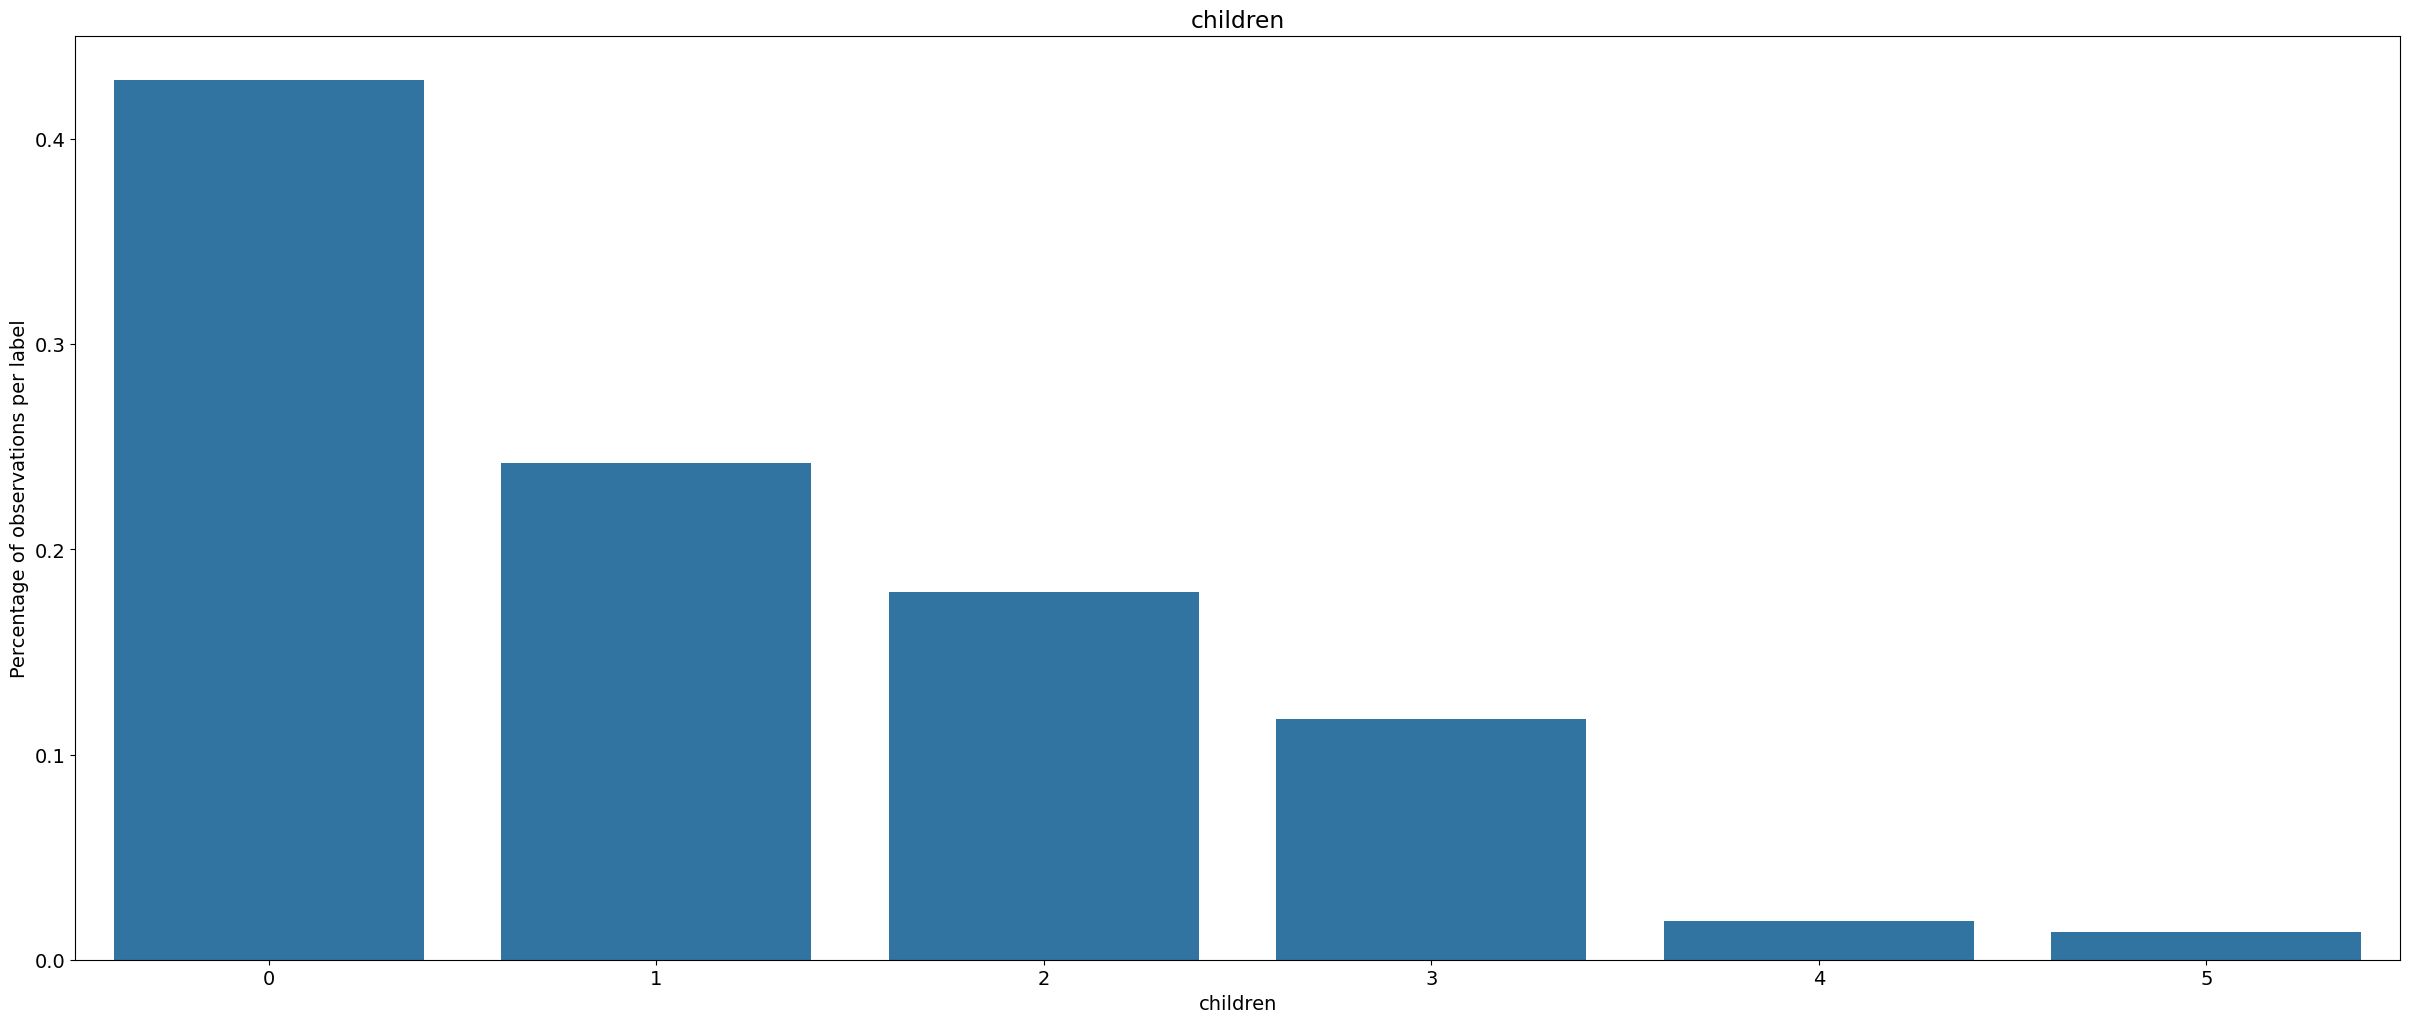

In [61]:
# iterate over the discrete features
for var in discrete_feature:
    # group the data by discrete feature and plot bar plot showing the percentage of observations per label
    sns.barplot(x=var, y=var, data=df, estimator=lambda x: len(x) / len(df))

    # add labels and title
    plt.ylabel("Percentage of observations per label")
    plt.title(var)

    # show the plot
    plt.show()

Insights

- From the outlier analysis of both continuous variables and discrete variables, some outliers are present in the dataset. Later we try dive into how to handle these outliers.


##### 4.4.8 MUTIVARIATE ANALYSIS USING PAIRPLOT


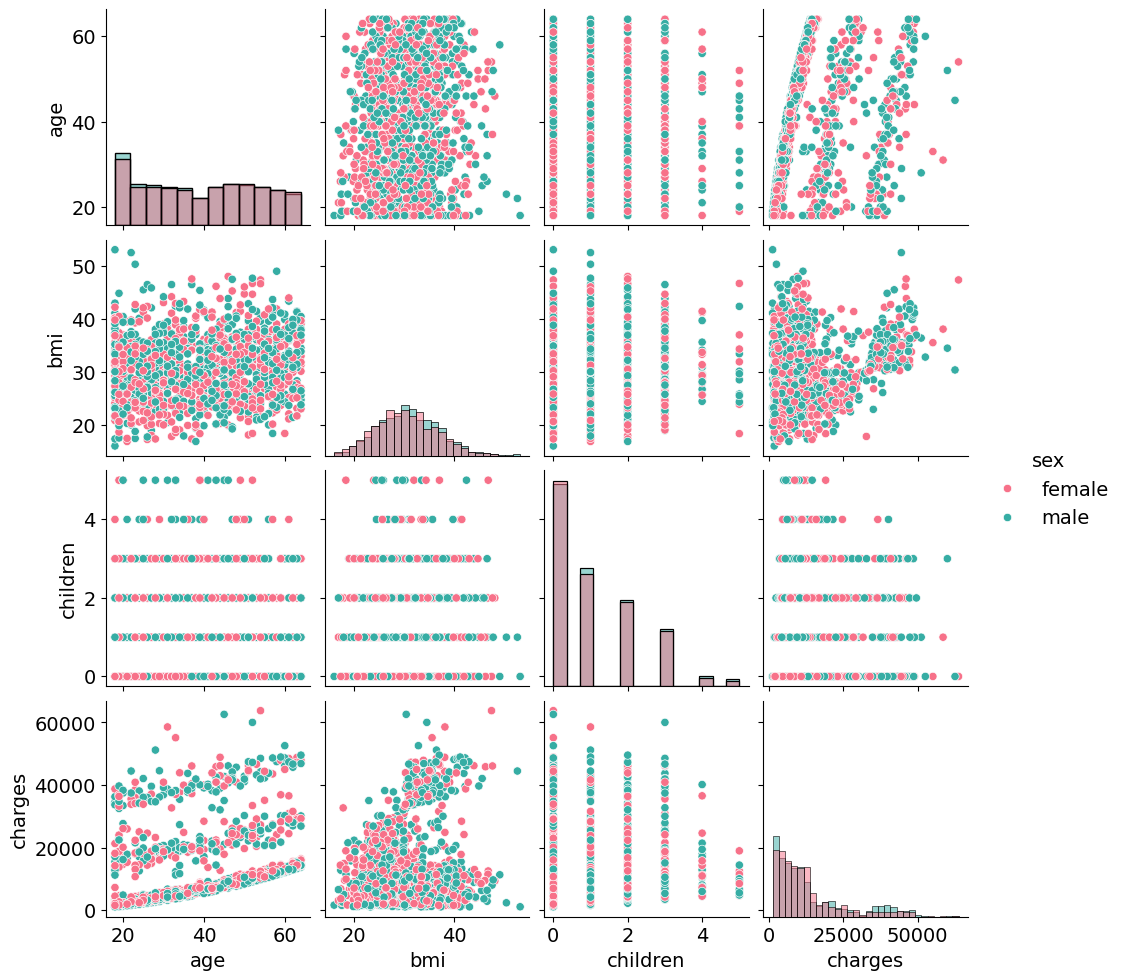

In [62]:
# pairplot of the dataframe
sns.pairplot(df, hue="sex", diag_kind="hist", kind="scatter", palette="husl")

# show the plot
plt.show()

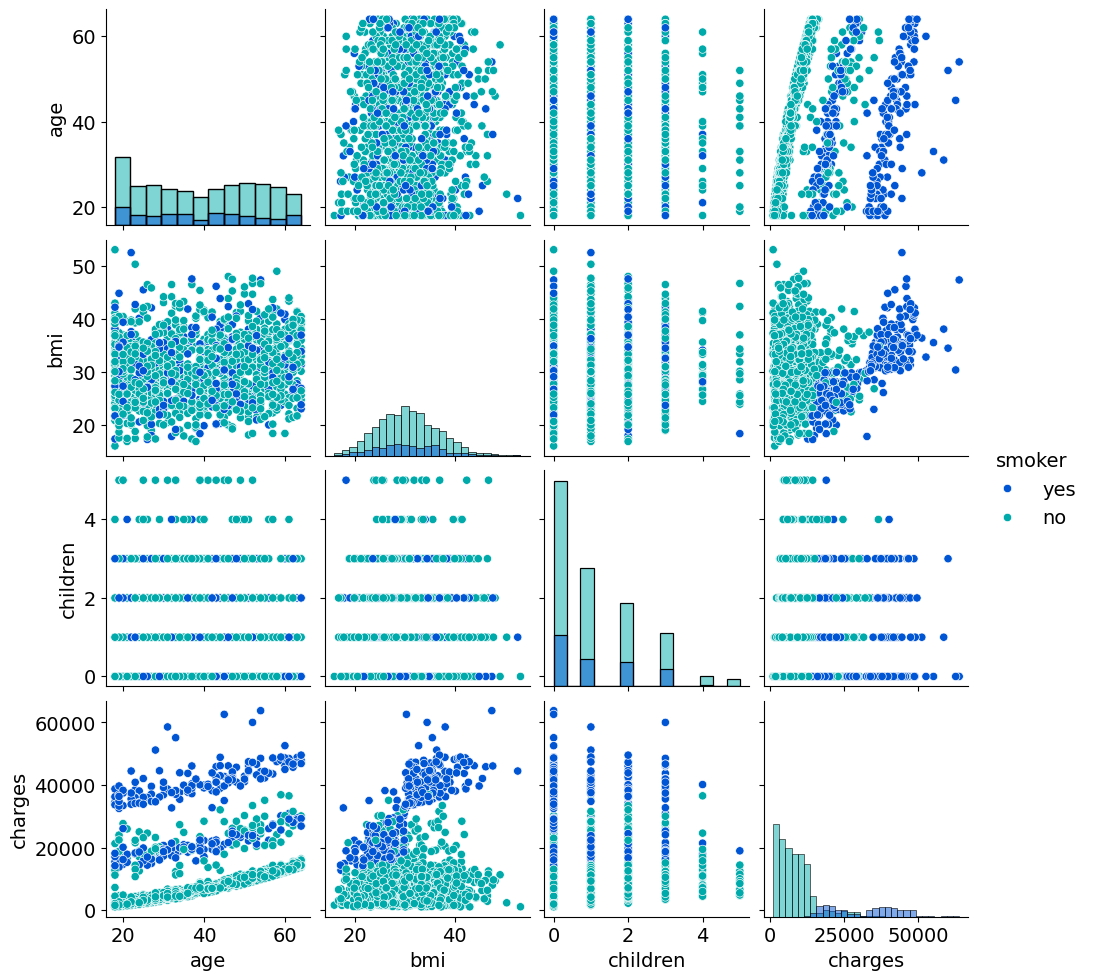

In [63]:
# create a pairplot of the dataframe
sns.pairplot(df, hue="smoker", diag_kind="hist", kind="scatter", palette="winter")

# show the plot
plt.show()

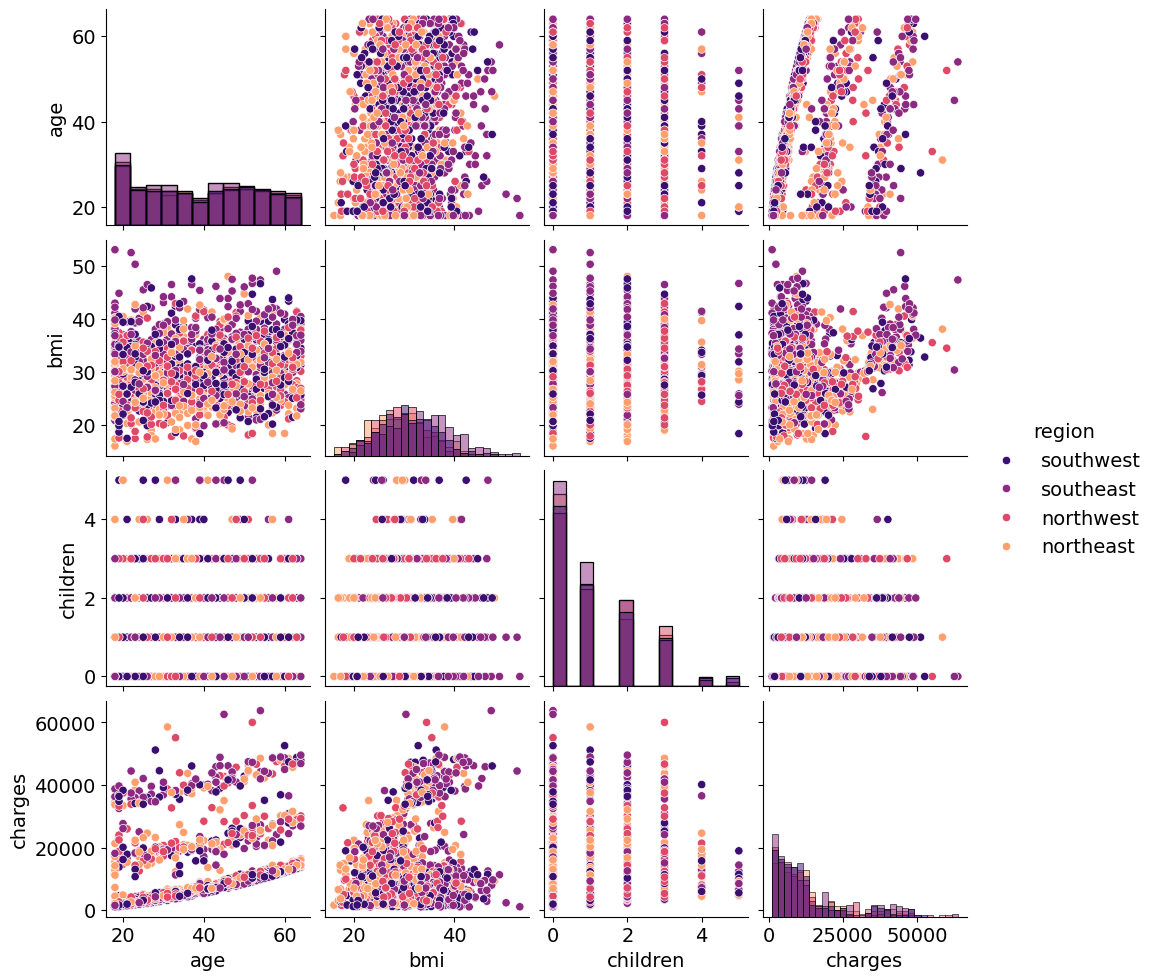

In [64]:
# create a pairplot of the dataframe
sns.pairplot(df, hue="region", diag_kind="hist", kind="scatter", palette="magma")

# show the plot
plt.show()

Insights

- From first pairplot, for children number 5, the insurance charges are lower than other children numbers. For BMI index 30 to 40, the insurance charges are relatively higher than other BMI indexes. And for BMI index 15 to 20, the insurance charges are lower than other BMI indexes.

- From the second plot it is clear that the insurance charges are higher for smokers than non-smokers. For same BMI index, the insurance charges are higher for smokers than non-smokers. For same children number, the insurance charges are higher for smokers than non-smokers. For same age, the insurance charges are higher for smokers than non-smokers.


### 5. Conclusions

So, we have done the exploratory data analysis of the medical insurance dataset. And we have got some interesting insights from the data. Now we can move on to the next step of the project which is data feature engineering(data preprocessing and feature selection) and model building.
